In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#### Importando dados abertos da Receita Federal  ###

ds_rfb=pd.read_excel('gn-municipios - Tabela 12B.xlsx')

In [4]:
ds_rfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Form                     11142 non-null  object 
 1   Municipios               11142 non-null  object 
 2   Qtde Declarantes         11142 non-null  int64  
 3   Rendim. Tribut.          11142 non-null  float64
 4   Rendim. Tribut. Exclus.  11142 non-null  float64
 5   Rendim. Isentos          11142 non-null  float64
 6   D - Contrib. Previd.     11142 non-null  float64
 7   D - Dependentes          11142 non-null  float64
 8   D - Instrucao            11142 non-null  float64
 9   D - Medicas              11142 non-null  float64
 10  D - Livro Caixa          11142 non-null  float64
 11  D - Pensao Aliment       11142 non-null  float64
 12  Desc. Padrao             11142 non-null  float64
 13  Base de Calculo (RTL)    11142 non-null  float64
 14  Imposto Devido        

In [5]:
ds_rfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Form                     11142 non-null  object 
 1   Municipios               11142 non-null  object 
 2   Qtde Declarantes         11142 non-null  int64  
 3   Rendim. Tribut.          11142 non-null  float64
 4   Rendim. Tribut. Exclus.  11142 non-null  float64
 5   Rendim. Isentos          11142 non-null  float64
 6   D - Contrib. Previd.     11142 non-null  float64
 7   D - Dependentes          11142 non-null  float64
 8   D - Instrucao            11142 non-null  float64
 9   D - Medicas              11142 non-null  float64
 10  D - Livro Caixa          11142 non-null  float64
 11  D - Pensao Aliment       11142 non-null  float64
 12  Desc. Padrao             11142 non-null  float64
 13  Base de Calculo (RTL)    11142 non-null  float64
 14  Imposto Devido        

In [6]:
## Verificando se há dados faltantes
print(ds_rfb.isna().sum())


Form                       0
Municipios                 0
Qtde Declarantes           0
Rendim. Tribut.            0
Rendim. Tribut. Exclus.    0
Rendim. Isentos            0
D - Contrib. Previd.       0
D - Dependentes            0
D - Instrucao              0
D - Medicas                0
D - Livro Caixa            0
D - Pensao Aliment         0
Desc. Padrao               0
Base de Calculo (RTL)      0
Imposto Devido             0
Imposto Pago               0
Imposto a Pagar            0
Imposto a Restituir        0
Bens e Direitos            0
Dividas e Onus             0
Doacoes e Herancas         0
dtype: int64


In [7]:
#### Tratamento dos dados abertos da Receita Federal ###
## limpando os nomes dos municípios
ds_rfb['Municipios'] = ds_rfb['Municipios'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
ds_rfb['Municipios'] = ds_rfb['Municipios'].apply(lambda x: x.upper())
ds_rfb.head()

,Form,Municipios,Qtde Declarantes,Rendim. Tribut.,Rendim. Tribut. Exclus.,Rendim. Isentos,D - Contrib. Previd.,D - Dependentes,D - Instrucao,D - Medicas,...,D - Pensao Aliment,Desc. Padrao,Base de Calculo (RTL),Imposto Devido,Imposto Pago,Imposto a Pagar,Imposto a Restituir,Bens e Direitos,Dividas e Onus,Doacoes e Herancas
0,modelo completo,ABADIA DE GOIAS - GO,390,20.768241,1.349012,4.884889,1.811105,1.267220,0.624261,1.858368,...,0.058614,0.0,14.787204,1.350125,1.630711,0.103928,0.384514,36.653062,3.752306,0.000000
1,modelo completo,ABADIA DOS DOURADOS - MG,94,4.934320,0.296803,0.880617,0.344833,0.279835,0.085707,0.461400,...,0.017146,0.0,3.530383,0.312236,0.284710,0.072856,0.045331,12.108165,2.172966,0.000000
2,modelo completo,ABADIANIA - GO,367,24.714494,2.383900,5.179472,2.096245,1.169391,0.712824,1.886531,...,0.011614,0.0,17.238709,2.078606,2.461757,0.093365,0.476515,57.069632,4.279086,0.056081
3,modelo completo,ABAETE - MG,856,58.222634,7.541971,26.638367,4.105983,2.113549,0.969959,4.902559,...,0.104069,0.0,43.582626,6.107072,6.058415,0.738277,0.689620,254.819698,15.516922,5.259583
4,modelo completo,ABAETETUBA - PA,5144,313.802935,25.778625,33.618572,27.335738,21.055865,17.446442,30.631709,...,0.345831,0.0,211.060350,19.323132,23.378961,2.246935,6.302764,183.706483,18.245521,0.080000


In [8]:
## Agrupando os dados por modelo de formulário da declaração em cada município. 
## os municípios também passam a ser o índice da tabela.
ds_rfb2 = ds_rfb.groupby(['Municipios']).sum()
ds_rfb2.head()

,Qtde Declarantes,Rendim. Tribut.,Rendim. Tribut. Exclus.,Rendim. Isentos,D - Contrib. Previd.,D - Dependentes,D - Instrucao,D - Medicas,D - Livro Caixa,D - Pensao Aliment,Desc. Padrao,Base de Calculo (RTL),Imposto Devido,Imposto Pago,Imposto a Pagar,Imposto a Restituir,Bens e Direitos,Dividas e Onus,Doacoes e Herancas
Municipios,,,,,,,,,,,,,,,,,,,
ABADIA DE GOIAS - GO,990,41.480603,2.478932,9.549435,1.811105,1.556155,0.624261,1.858368,0.113967,0.058614,0.000000,31.569717,2.185769,2.557154,0.208782,0.580167,89.029154,7.099612,0.000000
ABADIA DOS DOURADOS - MG,688,20.721690,1.763361,19.277570,0.344833,0.477767,0.085707,0.461400,0.124340,0.017146,3.088337,16.229416,0.802475,0.719935,0.217603,0.135063,115.208210,10.437680,2.315531
ABADIANIA - GO,1052,49.258640,4.032042,12.151301,2.096245,1.476527,0.712824,1.886531,1.078268,0.011614,4.638621,37.144234,3.259548,3.664981,0.405684,0.811117,162.392295,10.024888,0.213069
ABAETE - MG,2499,121.011294,12.872586,54.117882,4.105983,2.702795,0.969959,4.902559,1.249453,0.104069,11.718592,94.652694,9.383253,8.998269,1.611133,1.226148,573.457258,39.937204,8.287926
ABAETETUBA - PA,8361,427.352993,34.128819,50.606021,27.335738,22.741700,17.446442,30.631709,1.654822,0.345831,21.811826,302.798582,23.828879,28.387780,3.078593,7.637494,307.920039,25.122536,0.300000


In [9]:
## Verifica-se um total de 5.571 municípios nos dados da RFB
ds_rfb2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5571 entries, ABADIA DE GOIAS - GO to ZORTEA - SC
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Qtde Declarantes         5571 non-null   int64  
 1   Rendim. Tribut.          5571 non-null   float64
 2   Rendim. Tribut. Exclus.  5571 non-null   float64
 3   Rendim. Isentos          5571 non-null   float64
 4   D - Contrib. Previd.     5571 non-null   float64
 5   D - Dependentes          5571 non-null   float64
 6   D - Instrucao            5571 non-null   float64
 7   D - Medicas              5571 non-null   float64
 8   D - Livro Caixa          5571 non-null   float64
 9   D - Pensao Aliment       5571 non-null   float64
 10  Desc. Padrao             5571 non-null   float64
 11  Base de Calculo (RTL)    5571 non-null   float64
 12  Imposto Devido           5571 non-null   float64
 13  Imposto Pago             5571 non-null   float64
 14  Imp

In [10]:
## Calculando a média por declarantes e 
# multiplicando os valores por 1.000.000 (um milhão), para termos a ordem de grandeza real.

ds_rfb3 = ds_rfb2.apply(func = lambda x: (x*1000000)/ds_rfb2['Qtde Declarantes'])

## no passo anterior, o total de declarantes também foi dividido
## recuperando o valor original

ds_rfb3['Qtde Declarantes'] = ds_rfb2['Qtde Declarantes']


In [11]:
## Arrendondando os dados, com duas casas decimais
ds_rfb4 = ds_rfb3.round(decimals=2)
ds_rfb4.head()

,Qtde Declarantes,Rendim. Tribut.,Rendim. Tribut. Exclus.,Rendim. Isentos,D - Contrib. Previd.,D - Dependentes,D - Instrucao,D - Medicas,D - Livro Caixa,D - Pensao Aliment,Desc. Padrao,Base de Calculo (RTL),Imposto Devido,Imposto Pago,Imposto a Pagar,Imposto a Restituir,Bens e Direitos,Dividas e Onus,Doacoes e Herancas
Municipios,,,,,,,,,,,,,,,,,,,
ABADIA DE GOIAS - GO,990,41899.60,2503.97,9645.89,1829.40,1571.87,630.57,1877.14,115.12,59.21,0.00,31888.60,2207.85,2582.98,210.89,586.03,89928.44,7171.33,0.00
ABADIA DOS DOURADOS - MG,688,30118.74,2563.02,28019.72,501.21,694.43,124.57,670.64,180.73,24.92,4488.86,23589.27,1166.39,1046.42,316.28,196.31,167453.79,15171.05,3365.60
ABADIANIA - GO,1052,46823.80,3832.74,11550.67,1992.63,1403.54,677.59,1793.28,1024.97,11.04,4409.34,35308.21,3098.43,3483.82,385.63,771.02,154365.30,9529.36,202.54
ABAETE - MG,2499,48423.89,5151.09,21655.82,1643.05,1081.55,388.14,1961.81,499.98,41.64,4689.31,37876.23,3754.80,3600.75,644.71,490.66,229474.69,15981.27,3316.50
ABAETETUBA - PA,8361,51112.67,4081.91,6052.63,3269.43,2719.97,2086.65,3663.64,197.92,41.36,2608.76,36215.59,2850.00,3395.26,368.21,913.47,36828.14,3004.73,35.88


In [12]:
#### Importando dados do IBGE ###
ds_pop = pd.read_excel('pop IBGE 2018.xlsx')
ds_pib = pd.read_excel('PIB munic 2018.xlsx')

In [13]:
## Verificando se há dados faltantes
print(ds_pop.isna().sum())

UF                    0
COD. UF               0
COD. MUNIC            0
NOME DO MUNICÍPIO     0
POPULAÇÃO ESTIMADA    0
dtype: int64


In [14]:
print(ds_pib.isna().sum())

Ano                                                                                                                                                        0
Código da Grande Região                                                                                                                                    0
Nome da Grande Região                                                                                                                                      0
Código da Unidade da Federação                                                                                                                             0
Sigla da Unidade da Federação                                                                                                                              0
Nome da Unidade da Federação                                                                                                                               0
Código do Município                                       

In [15]:
## Observa-se que há dados faltantes na tabela do PIB, mas serão colunas que não serão utilizadas no modelo

In [16]:
ds_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UF                  5570 non-null   object
 1   COD. UF             5570 non-null   int64 
 2   COD. MUNIC          5570 non-null   int64 
 3   NOME DO MUNICÍPIO   5570 non-null   object
 4   POPULAÇÃO ESTIMADA  5570 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 217.7+ KB


In [17]:
ds_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 43 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Ano                                                                                                                                                5570 non-null   int64  
 1   Código da Grande Região                                                                                                                            5570 non-null   int64  
 2   Nome da Grande Região                                                                                                                              5570 non-null   object 
 3   Código d

In [18]:
## Destaca-se que os dados do IBGE possuem apenas 5.570 municípios - um a menos do que a tabela da RFB

In [19]:
#### Tratamento dos dados do IBGE ###
## Selecionando as colunas de interesse

ds_pop2 = ds_pop[['COD. UF','COD. MUNIC','NOME DO MUNICÍPIO','UF','POPULAÇÃO ESTIMADA']]
ds_pop2.head()

,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,UF,POPULAÇÃO ESTIMADA
0,11,15,Alta Floresta D'Oeste,RO,23167
1,11,23,Ariquemes,RO,106168
2,11,31,Cabixi,RO,5438
3,11,49,Cacoal,RO,84813
4,11,56,Cerejeiras,RO,16444


In [20]:
## Selecionando as colunas de interesse
# Renomeando coluna para 'PIB per capita'
# A coluna 'Atividade com maior valor adicionado bruto' será mantida para futura avaliação dos resultados

ds_pib2 = ds_pib[['Código da Unidade da Federação','Código do Município','Nome do Município','Sigla da Unidade da Federação','Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Atividade com maior valor adicionado bruto']]
ds_pib2.rename(columns={'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)': 'PIB per capita'}, inplace=True)
ds_pib2.head()

,Código da Unidade da Federação,Código do Município,Nome do Município,Sigla da Unidade da Federação,PIB per capita,Atividade com maior valor adicionado bruto
0,11,1100015,Alta Floresta D'Oeste,RO,21552.47,"Administração, defesa, educação e saúde públic..."
1,11,1100023,Ariquemes,RO,23206.36,Demais serviços
2,11,1100031,Cabixi,RO,25837.12,"Administração, defesa, educação e saúde públic..."
3,11,1100049,Cacoal,RO,25708.96,Demais serviços
4,11,1100056,Cerejeiras,RO,28714.35,Demais serviços


In [21]:
## Limpando os nomes dos municípios
ds_pop2['NOME DO MUNICÍPIO'] = ds_pop2['NOME DO MUNICÍPIO'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
ds_pop2['NOME DO MUNICÍPIO'] = ds_pop2['NOME DO MUNICÍPIO'].apply(lambda x: x.upper())

In [22]:
## Limpando os nomes dos municípios
ds_pib2['Nome do Município'] = ds_pib2['Nome do Município'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
ds_pib2['Nome do Município'] = ds_pib2['Nome do Município'].apply(lambda x: x.upper())

In [23]:
# Criando uma coluna com os municípios no mesmo formato dos dados da RFB
ds_pop2['MUNICÍPIO_UF'] = ds_pop2['NOME DO MUNICÍPIO']+' - '+ds_pop2['UF']
ds_pib2['MUNICÍPIO_UF'] = ds_pib2['Nome do Município']+' - '+ds_pib2['Sigla da Unidade da Federação']

In [24]:
ds_pop2.head()


,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,UF,POPULAÇÃO ESTIMADA,MUNICÍPIO_UF
0,11,15,ALTA FLORESTA D'OESTE,RO,23167,ALTA FLORESTA D'OESTE - RO
1,11,23,ARIQUEMES,RO,106168,ARIQUEMES - RO
2,11,31,CABIXI,RO,5438,CABIXI - RO
3,11,49,CACOAL,RO,84813,CACOAL - RO
4,11,56,CEREJEIRAS,RO,16444,CEREJEIRAS - RO


In [25]:
ds_pib2.head()

,Código da Unidade da Federação,Código do Município,Nome do Município,Sigla da Unidade da Federação,PIB per capita,Atividade com maior valor adicionado bruto,MUNICÍPIO_UF
0,11,1100015,ALTA FLORESTA D'OESTE,RO,21552.47,"Administração, defesa, educação e saúde públic...",ALTA FLORESTA D'OESTE - RO
1,11,1100023,ARIQUEMES,RO,23206.36,Demais serviços,ARIQUEMES - RO
2,11,1100031,CABIXI,RO,25837.12,"Administração, defesa, educação e saúde públic...",CABIXI - RO
3,11,1100049,CACOAL,RO,25708.96,Demais serviços,CACOAL - RO
4,11,1100056,CEREJEIRAS,RO,28714.35,Demais serviços,CEREJEIRAS - RO


In [26]:
# Criando uma nova coluna de código do município na tabela PIB, para utilizar como junção com a tabela de População

ds_pib2['Cod_Municipio'] = ds_pib2['Código do Município'].astype(str).str[-5:].astype(int) 
ds_pib2.head(20)

,Código da Unidade da Federação,Código do Município,Nome do Município,Sigla da Unidade da Federação,PIB per capita,Atividade com maior valor adicionado bruto,MUNICÍPIO_UF,Cod_Municipio
0,11,1100015,ALTA FLORESTA D'OESTE,RO,21552.47,"Administração, defesa, educação e saúde públic...",ALTA FLORESTA D'OESTE - RO,15
1,11,1100023,ARIQUEMES,RO,23206.36,Demais serviços,ARIQUEMES - RO,23
2,11,1100031,CABIXI,RO,25837.12,"Administração, defesa, educação e saúde públic...",CABIXI - RO,31
3,11,1100049,CACOAL,RO,25708.96,Demais serviços,CACOAL - RO,49
4,11,1100056,CEREJEIRAS,RO,28714.35,Demais serviços,CEREJEIRAS - RO,56
5,11,1100064,COLORADO DO OESTE,RO,20362.88,"Administração, defesa, educação e saúde públic...",COLORADO DO OESTE - RO,64
6,11,1100072,CORUMBIARA,RO,42371.91,"Produção florestal, pesca e aquicultura",CORUMBIARA - RO,72
7,11,1100080,COSTA MARQUES,RO,12890.70,"Administração, defesa, educação e saúde públic...",COSTA MARQUES - RO,80
8,11,1100098,ESPIGAO D'OESTE,RO,18984.55,"Administração, defesa, educação e saúde públic...",ESPIGAO D'OESTE - RO,98
9,11,1100106,GUAJARA-MIRIM,RO,18279.32,"Administração, defesa, educação e saúde públic...",GUAJARA-MIRIM - RO,106


In [27]:
## Junção dos dados do IBGE

ds_IBGE = ds_pib2.merge(ds_pop2, right_on=['COD. UF','COD. MUNIC'], left_on=['Código da Unidade da Federação','Cod_Municipio'])
ds_IBGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Código da Unidade da Federação              5570 non-null   int64  
 1   Código do Município                         5570 non-null   int64  
 2   Nome do Município                           5570 non-null   object 
 3   Sigla da Unidade da Federação               5570 non-null   object 
 4   PIB per capita                              5570 non-null   float64
 5   Atividade com maior valor adicionado bruto  5570 non-null   object 
 6   MUNICÍPIO_UF_x                              5570 non-null   object 
 7   Cod_Municipio                               5570 non-null   int32  
 8   COD. UF                                     5570 non-null   int64  
 9   COD. MUNIC                                  5570 non-null   int64  
 10  NOME DO MUNI

In [28]:
## Será utilizada a coluna de Municípios da tabela Pop, pois há menor diferença de grafias para a tabela RFB
ds_IBGE.rename(columns={'MUNICÍPIO_UF_y': 'MUNICÍPIO_UF'}, inplace=True)

In [29]:
ds_IBGE.head()

,Código da Unidade da Federação,Código do Município,Nome do Município,Sigla da Unidade da Federação,PIB per capita,Atividade com maior valor adicionado bruto,MUNICÍPIO_UF_x,Cod_Municipio,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,UF,POPULAÇÃO ESTIMADA,MUNICÍPIO_UF
0,11,1100015,ALTA FLORESTA D'OESTE,RO,21552.47,"Administração, defesa, educação e saúde públic...",ALTA FLORESTA D'OESTE - RO,15,11,15,ALTA FLORESTA D'OESTE,RO,23167,ALTA FLORESTA D'OESTE - RO
1,11,1100023,ARIQUEMES,RO,23206.36,Demais serviços,ARIQUEMES - RO,23,11,23,ARIQUEMES,RO,106168,ARIQUEMES - RO
2,11,1100031,CABIXI,RO,25837.12,"Administração, defesa, educação e saúde públic...",CABIXI - RO,31,11,31,CABIXI,RO,5438,CABIXI - RO
3,11,1100049,CACOAL,RO,25708.96,Demais serviços,CACOAL - RO,49,11,49,CACOAL,RO,84813,CACOAL - RO
4,11,1100056,CEREJEIRAS,RO,28714.35,Demais serviços,CEREJEIRAS - RO,56,11,56,CEREJEIRAS,RO,16444,CEREJEIRAS - RO


In [30]:
# Alterando o index para a coluna MUNICÍPIO_UF e selecionado as colunas de interesse
ds_IBGE.index = ds_IBGE['MUNICÍPIO_UF']
ds_IBGE2 = ds_IBGE[['PIB per capita','POPULAÇÃO ESTIMADA']]
ds_IBGE2.head()


,PIB per capita,POPULAÇÃO ESTIMADA
MUNICÍPIO_UF,,
ALTA FLORESTA D'OESTE - RO,21552.47,23167
ARIQUEMES - RO,23206.36,106168
CABIXI - RO,25837.12,5438
CACOAL - RO,25708.96,84813
CEREJEIRAS - RO,28714.35,16444


In [31]:
## Verificando se há dados faltantes
print(ds_IBGE2.isna().sum())

PIB per capita        0
POPULAÇÃO ESTIMADA    0
dtype: int64


In [32]:
### Junção dos dados IBGE e RFB ###
ds_completo = ds_rfb4.merge(ds_IBGE2, left_index=True, right_index=True)

In [33]:
## Verificando se há dados faltantes
print(ds_completo.isna().sum())

Qtde Declarantes           0
Rendim. Tribut.            0
Rendim. Tribut. Exclus.    0
Rendim. Isentos            0
D - Contrib. Previd.       0
D - Dependentes            0
D - Instrucao              0
D - Medicas                0
D - Livro Caixa            0
D - Pensao Aliment         0
Desc. Padrao               0
Base de Calculo (RTL)      0
Imposto Devido             0
Imposto Pago               0
Imposto a Pagar            0
Imposto a Restituir        0
Bens e Direitos            0
Dividas e Onus             0
Doacoes e Herancas         0
PIB per capita             0
POPULAÇÃO ESTIMADA         0
dtype: int64


In [34]:
ds_completo.head()

,Qtde Declarantes,Rendim. Tribut.,Rendim. Tribut. Exclus.,Rendim. Isentos,D - Contrib. Previd.,D - Dependentes,D - Instrucao,D - Medicas,D - Livro Caixa,D - Pensao Aliment,...,Base de Calculo (RTL),Imposto Devido,Imposto Pago,Imposto a Pagar,Imposto a Restituir,Bens e Direitos,Dividas e Onus,Doacoes e Herancas,PIB per capita,POPULAÇÃO ESTIMADA
ABADIA DE GOIAS - GO,990,41899.60,2503.97,9645.89,1829.40,1571.87,630.57,1877.14,115.12,59.21,...,31888.60,2207.85,2582.98,210.89,586.03,89928.44,7171.33,0.00,26505.89,8583
ABADIA DOS DOURADOS - MG,688,30118.74,2563.02,28019.72,501.21,694.43,124.57,670.64,180.73,24.92,...,23589.27,1166.39,1046.42,316.28,196.31,167453.79,15171.05,3365.60,18353.48,6972
ABADIANIA - GO,1052,46823.80,3832.74,11550.67,1992.63,1403.54,677.59,1793.28,1024.97,11.04,...,35308.21,3098.43,3483.82,385.63,771.02,154365.30,9529.36,202.54,16132.95,19614
ABAETE - MG,2499,48423.89,5151.09,21655.82,1643.05,1081.55,388.14,1961.81,499.98,41.64,...,37876.23,3754.80,3600.75,644.71,490.66,229474.69,15981.27,3316.50,21286.43,23223
ABAETETUBA - PA,8361,51112.67,4081.91,6052.63,3269.43,2719.97,2086.65,3663.64,197.92,41.36,...,36215.59,2850.00,3395.26,368.21,913.47,36828.14,3004.73,35.88,9046.13,156292


In [35]:
ds_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, ABADIA DE GOIAS - GO to ZORTEA - SC
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Qtde Declarantes         5541 non-null   int64  
 1   Rendim. Tribut.          5541 non-null   float64
 2   Rendim. Tribut. Exclus.  5541 non-null   float64
 3   Rendim. Isentos          5541 non-null   float64
 4   D - Contrib. Previd.     5541 non-null   float64
 5   D - Dependentes          5541 non-null   float64
 6   D - Instrucao            5541 non-null   float64
 7   D - Medicas              5541 non-null   float64
 8   D - Livro Caixa          5541 non-null   float64
 9   D - Pensao Aliment       5541 non-null   float64
 10  Desc. Padrao             5541 non-null   float64
 11  Base de Calculo (RTL)    5541 non-null   float64
 12  Imposto Devido           5541 non-null   float64
 13  Imposto Pago             5541 non-null   float64
 14  Imp

In [36]:
## Observa-se que a tabela final ficou com 5.541 municípios, pois há diferenças de grafia entre as tabelas RFB e IBGE

In [37]:
#### Análise exploratória dos dados completos ###
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [38]:
### Teste de Hipótese de Normalidade - Shapiro-Wilk ###

## O Teste de Shapiro não funciona bem para amostras maiores do que 5000 observações
## Assim, vamos selecionar linhas aleatoriamente 

ds_completo_rnd = ds_completo.sample(n=4800, random_state=1)

for valor in ds_completo_rnd.columns:
  nome = str(valor)
  x = ds_completo_rnd[nome]
  shapiro_stat, shapiro_p_valor = stats.shapiro(x)
  alpha = 0.05
  print("Para a coluna "+ nome + ", o valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))
  print("Para a coluna "+ nome + ", o p_value Shapiro-Wilk = " + str(shapiro_p_valor))
  if shapiro_p_valor > alpha:
	  print("Com 95% de confiança, os dados de "+ nome + " são similiares a uma distribuição NORMAL (não foi possível rejeitar H0) \n")
  else:
	  print("Distribuição dos dados de " + nome + " NÃO é normal (H0 rejeitada) \n")
  




Para a coluna Qtde Declarantes, o valor da estatística de Shapiro-Wilk = 0.051326096057891846
Para a coluna Qtde Declarantes, o p_value Shapiro-Wilk = 0.0
Distribuição dos dados de Qtde Declarantes NÃO é normal (H0 rejeitada) 

Para a coluna Rendim. Tribut., o valor da estatística de Shapiro-Wilk = 0.9542412757873535
Para a coluna Rendim. Tribut., o p_value Shapiro-Wilk = 2.3711508978401365e-36
Distribuição dos dados de Rendim. Tribut. NÃO é normal (H0 rejeitada) 

Para a coluna Rendim. Tribut. Exclus., o valor da estatística de Shapiro-Wilk = 0.5565780401229858
Para a coluna Rendim. Tribut. Exclus., o p_value Shapiro-Wilk = 0.0
Distribuição dos dados de Rendim. Tribut. Exclus. NÃO é normal (H0 rejeitada) 

Para a coluna Rendim. Isentos, o valor da estatística de Shapiro-Wilk = 0.37069129943847656
Para a coluna Rendim. Isentos, o p_value Shapiro-Wilk = 0.0
Distribuição dos dados de Rendim. Isentos NÃO é normal (H0 rejeitada) 

Para a coluna D - Contrib. Previd., o valor da estatística 

In [39]:
### Teste de Hipótese de Normalidade - Kolmogorov-Smirnov ###
from scipy.stats import kstest

for valor in ds_completo.columns:
  nome = str(valor)
  x = ds_completo[nome]
  ks_stat, ks_p_valor = kstest(x, 'norm')
  alpha = 0.05
  print("Para a coluna "+ nome + ", o valor da estatística de Kolmogorov-Smirnov = " + str(ks_stat))
  print("Para a coluna "+ nome + ", o p_value Kolmogorov-Smirnov = " + str(ks_p_valor))
  if ks_p_valor > alpha:
	  print("Com 95% de confiança, os dados de "+ nome + " são similiares a uma distribuição NORMAL (não foi possível rejeitar H0) \n")
  else:
	  print("Distribuição dos dados de " + nome + " NÃO é normal (H0 rejeitada) \n")

Para a coluna Qtde Declarantes, o valor da estatística de Kolmogorov-Smirnov = 1.0
Para a coluna Qtde Declarantes, o p_value Kolmogorov-Smirnov = 0.0
Distribuição dos dados de Qtde Declarantes NÃO é normal (H0 rejeitada) 

Para a coluna Rendim. Tribut., o valor da estatística de Kolmogorov-Smirnov = 1.0
Para a coluna Rendim. Tribut., o p_value Kolmogorov-Smirnov = 0.0
Distribuição dos dados de Rendim. Tribut. NÃO é normal (H0 rejeitada) 

Para a coluna Rendim. Tribut. Exclus., o valor da estatística de Kolmogorov-Smirnov = 1.0
Para a coluna Rendim. Tribut. Exclus., o p_value Kolmogorov-Smirnov = 0.0
Distribuição dos dados de Rendim. Tribut. Exclus. NÃO é normal (H0 rejeitada) 

Para a coluna Rendim. Isentos, o valor da estatística de Kolmogorov-Smirnov = 1.0
Para a coluna Rendim. Isentos, o p_value Kolmogorov-Smirnov = 0.0
Distribuição dos dados de Rendim. Isentos NÃO é normal (H0 rejeitada) 

Para a coluna D - Contrib. Previd., o valor da estatística de Kolmogorov-Smirnov = 1.0
Para a

In [40]:
## Verifica-se que as variáveis não possuem distribuição normal

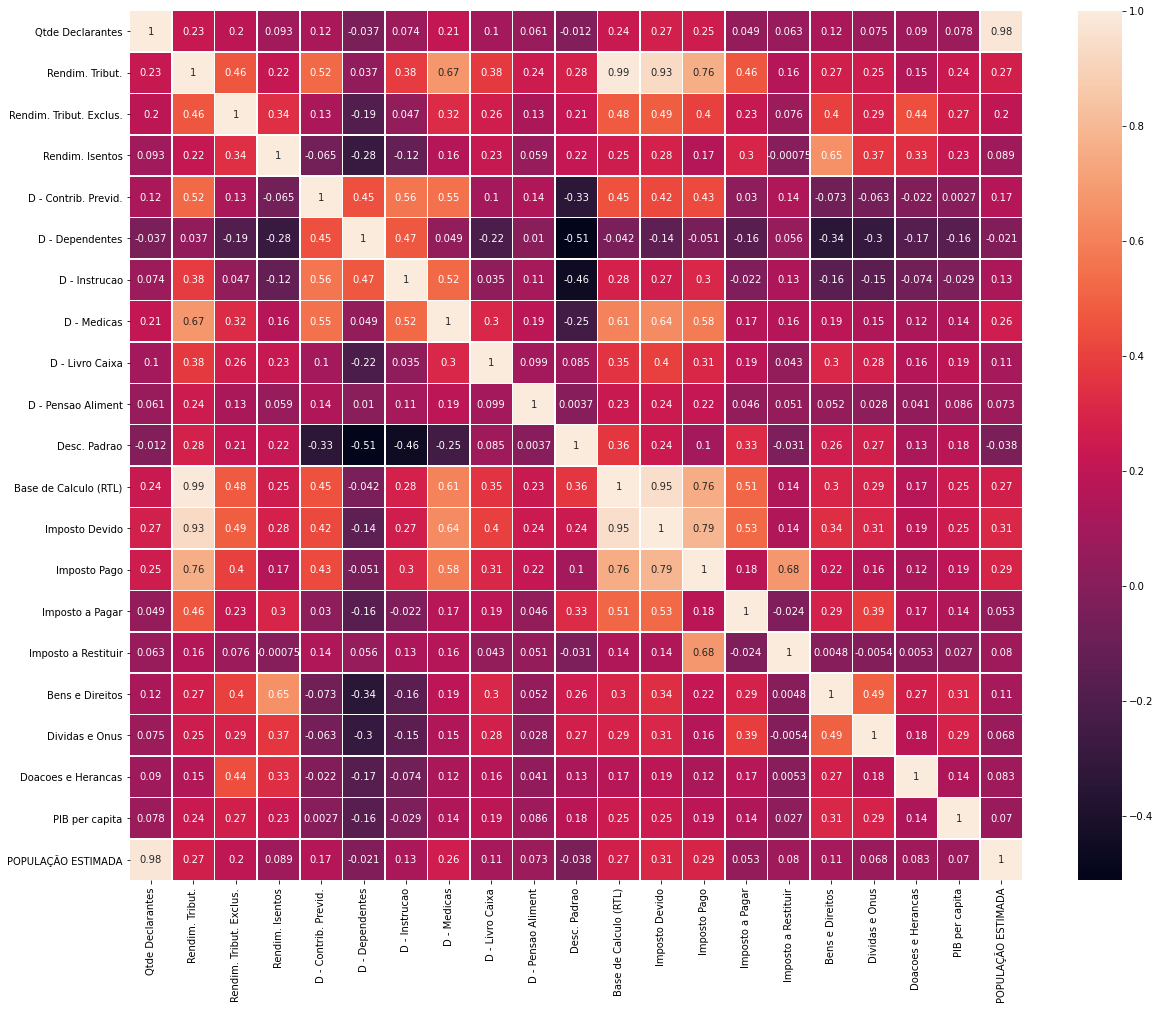

In [41]:
## Matriz de correlação de Pearson entre as variáveis
# Supõe que as variáveis possuem distribuição normal
fig, ax = plt.subplots(figsize=(20,16))
corr_pearson = sns.heatmap(ds_completo.corr(method='pearson'), annot=True, linewidths=.5)


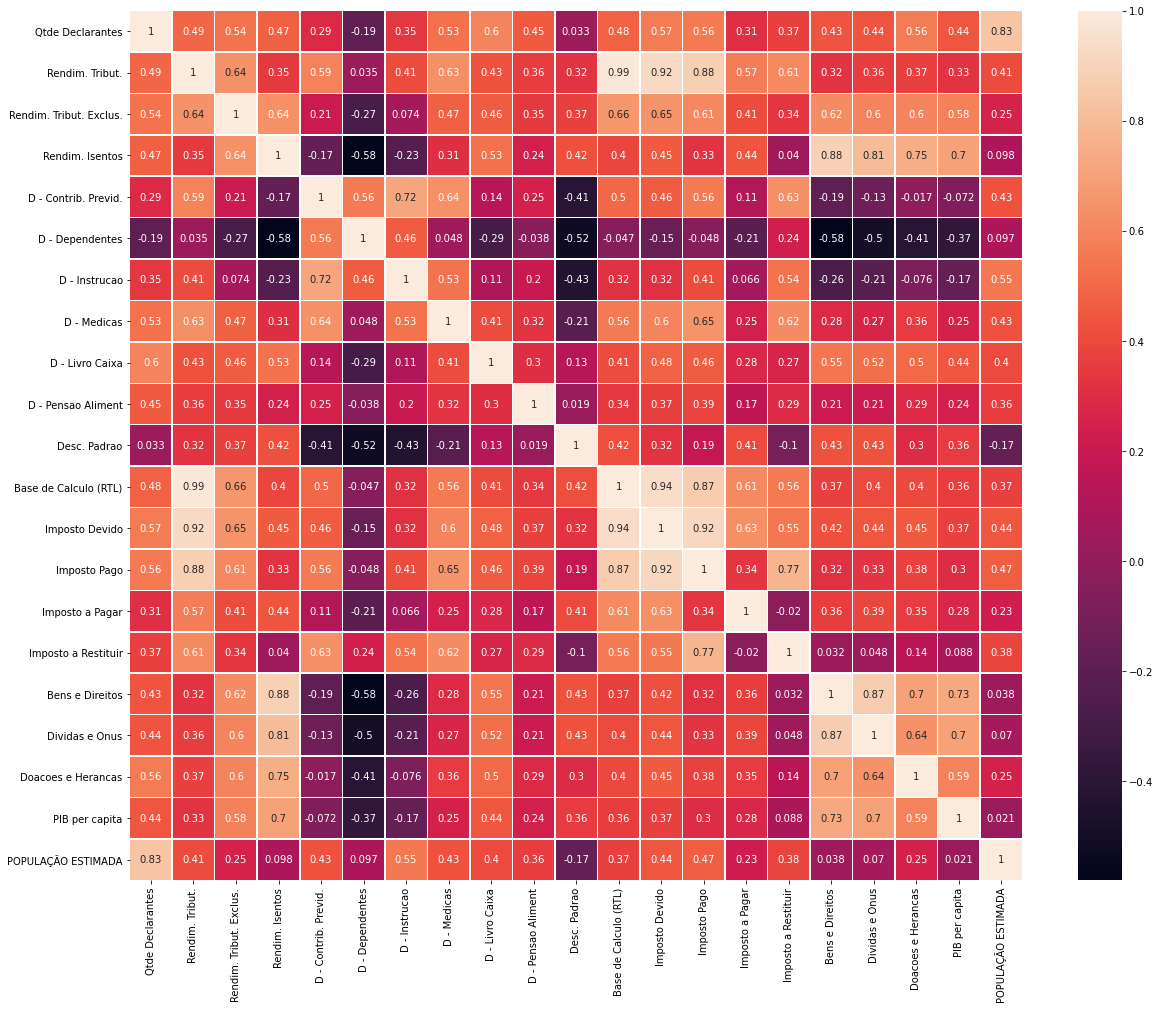

In [42]:
## Matriz de correlação de Spearman entre as variáveis
# Não há suposição de distribuição normal das variáveis
fig, ax = plt.subplots(figsize=(20,16))
corr_spearman = sns.heatmap(ds_completo.corr(method='spearman'), annot=True, linewidths=.5)

In [43]:
## Observa-se uma grande correlação entre as variáveis Rendimento Tributável e 'Base de Calculo (RTL)' e 'Imposto Devido'
## Também há uma grande correlação entre Quantidade de Declarantes e População
# Essa correlação é esperada


In [44]:
### Redução de Componentes utilizando o conhecimento do especialista ###
## Iremos realizar a combinação de algumas variáveis, de uma maneira padronizada na RFB

In [45]:
ds_completo_esp=[]
ds_completo_esp=pd.DataFrame(ds_completo_esp)
ds_completo_esp['Total de Rendimentos'] = ds_completo['Rendim. Tribut.']+ds_completo['Rendim. Tribut. Exclus.']+ds_completo['Rendim. Isentos']
ds_completo_esp['Deduções e Pagamentos'] = ds_completo['D - Contrib. Previd.']+ds_completo['D - Dependentes']+ds_completo['D - Instrucao']+ds_completo['D - Medicas']+ds_completo['D - Livro Caixa']+ds_completo['D - Pensao Aliment']+ds_completo['Desc. Padrao']+ds_completo['Imposto Pago']
ds_completo_esp['Imposto Devido'] = ds_completo['Imposto Devido']
ds_completo_esp['Patrimônio'] = ds_completo['Bens e Direitos']-ds_completo['Dividas e Onus']
ds_completo_esp['PIB per capita'] = ds_completo['PIB per capita']
ds_completo_esp['POPULAÇÃO ESTIMADA'] = ds_completo['POPULAÇÃO ESTIMADA']


In [46]:
ds_completo_esp.head()

,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA
ABADIA DE GOIAS - GO,54049.46,8666.29,2207.85,82757.11,26505.89,8583
ABADIA DOS DOURADOS - MG,60701.48,7731.78,1166.39,152282.74,18353.48,6972
ABADIANIA - GO,62207.21,14796.21,3098.43,144835.94,16132.95,19614
ABAETE - MG,75230.80,13906.23,3754.80,213493.42,21286.43,23223
ABAETETUBA - PA,61247.21,17982.99,2850.00,33823.41,9046.13,156292


In [47]:
ds_completo_esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, ABADIA DE GOIAS - GO to ZORTEA - SC
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total de Rendimentos   5541 non-null   float64
 1   Deduções e Pagamentos  5541 non-null   float64
 2   Imposto Devido         5541 non-null   float64
 3   Patrimônio             5541 non-null   float64
 4   PIB per capita         5541 non-null   float64
 5   POPULAÇÃO ESTIMADA     5541 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 303.0+ KB


In [48]:
### Análise exploratória dos dados após a redução dos atributos ###

In [49]:
ds_completo_esp.describe()

,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA
count,5541.000000,5541.000000,5541.000000,5.541000e+03,5541.000000,5.541000e+03
mean,63177.165365,12757.601640,2642.567979,1.234966e+05,23524.606001,3.746593e+04
std,22463.351349,2731.014923,1218.314467,1.363367e+05,24279.265120,2.205125e+05
min,22932.660000,4205.470000,325.800000,-1.589640e+05,4788.180000,7.860000e+02
25%,50922.270000,11011.020000,1829.640000,4.315478e+04,9878.160000,5.454000e+03
50%,59324.540000,12425.970000,2404.470000,1.036031e+05,17437.520000,1.159000e+04
75%,71345.080000,14113.210000,3182.850000,1.777077e+05,28714.350000,2.529100e+04
max,975468.400000,67387.550000,14840.230000,6.534198e+06,583171.850000,1.217687e+07


<Figure size 432x288 with 0 Axes>

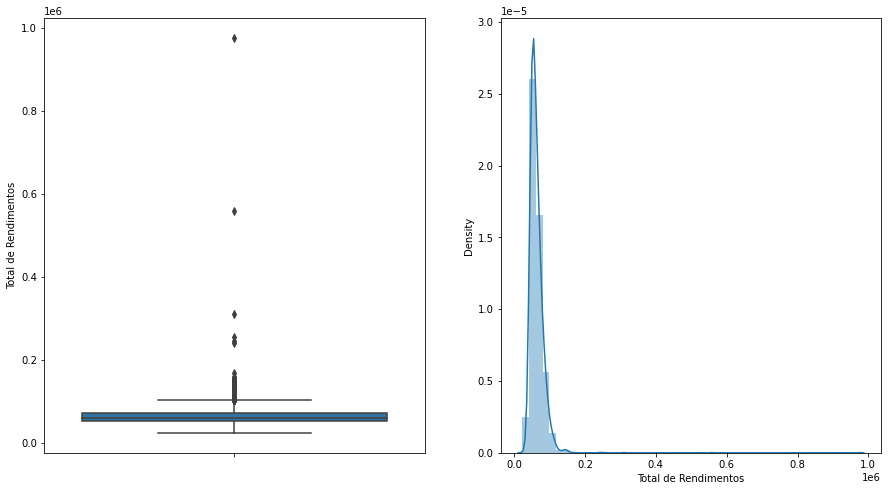

<Figure size 432x288 with 0 Axes>

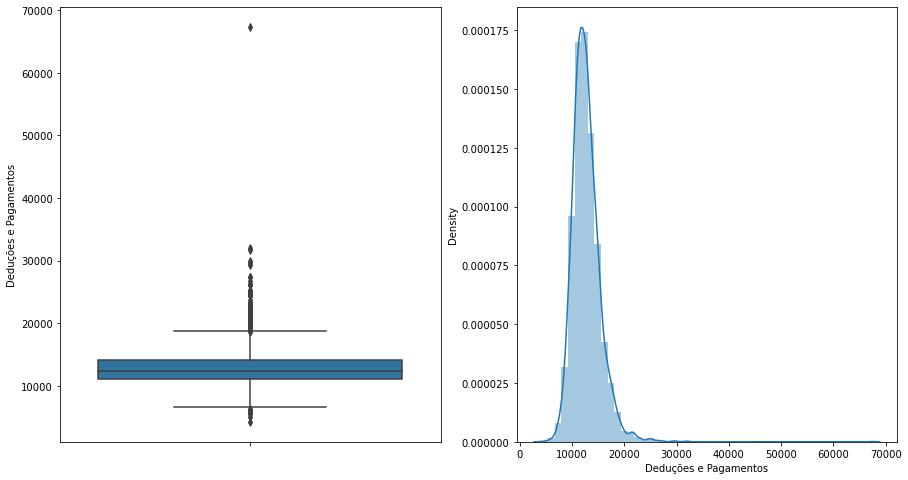

<Figure size 432x288 with 0 Axes>

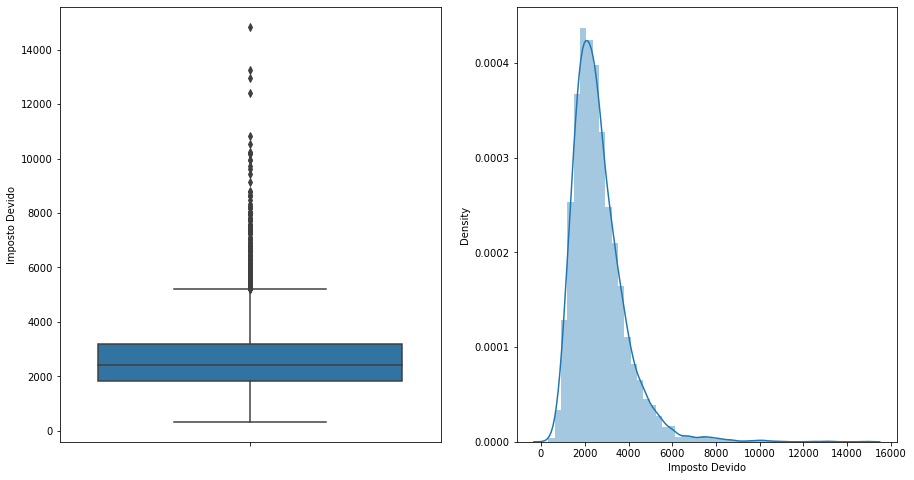

<Figure size 432x288 with 0 Axes>

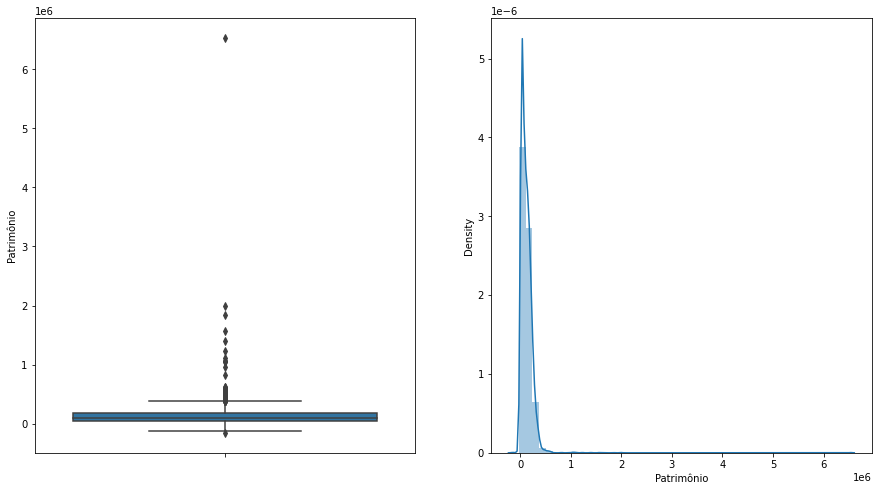

<Figure size 432x288 with 0 Axes>

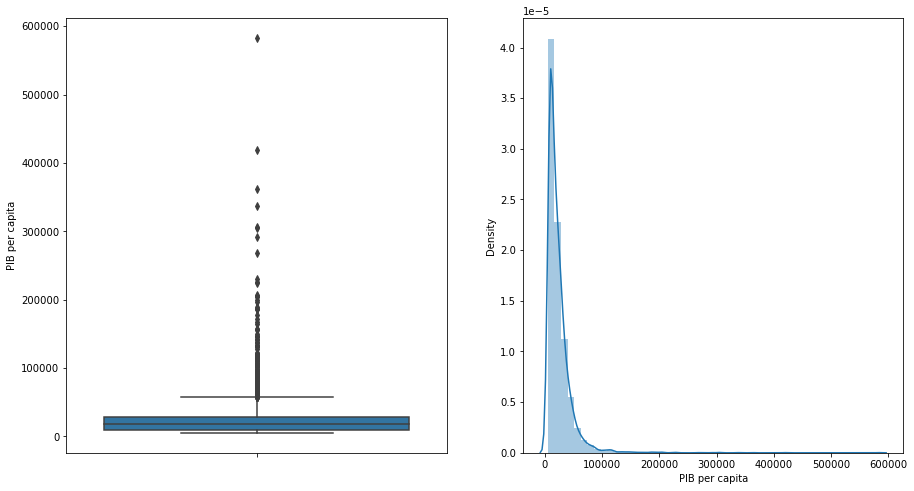

<Figure size 432x288 with 0 Axes>

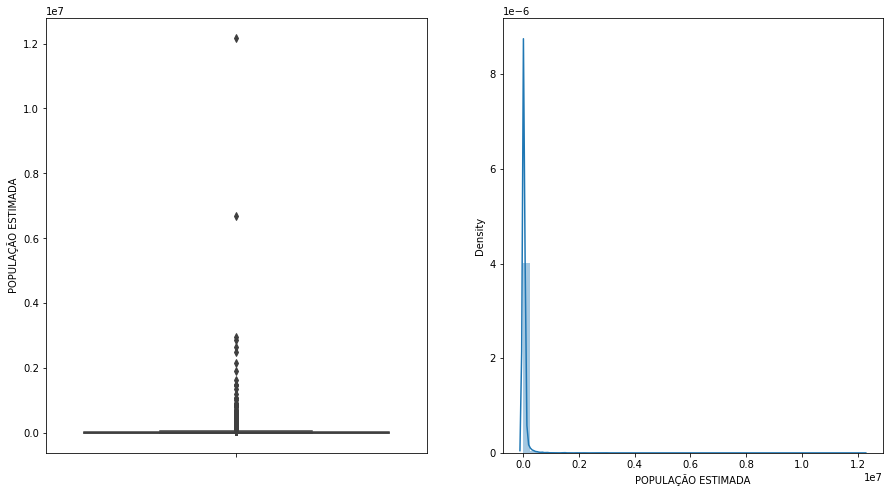

In [50]:
## Imprimindo os Boxplots e a Distribuição de cada coluna

for valor in ds_completo_esp.columns:
  figure = plt.figure()
  nome = str(valor)  
  figure, axs = plt.subplots(1,2, figsize=(15,8))
  sns.boxplot(y=ds_completo_esp[nome], ax=axs[0]) 
  sns.distplot(ds_completo_esp[nome], ax=axs[1])
  plt.show()  
  figure.savefig('boxplot e distribuição'+ " " + nome + '.png' )

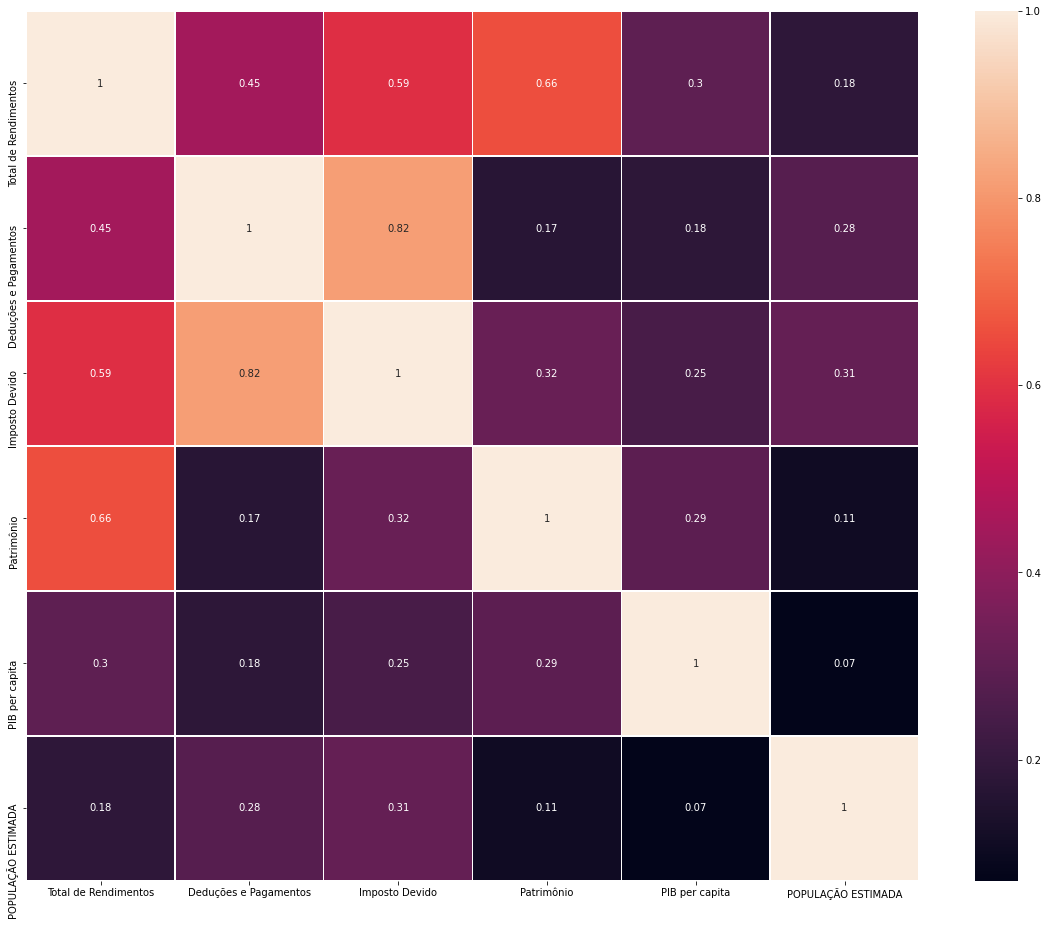

In [51]:
## Matriz de correlação de Pearson entre as variáveis
fig, ax = plt.subplots(figsize=(20,16))
corr_pearson = sns.heatmap(ds_completo_esp.corr(method='pearson'), annot=True, linewidths=.5)


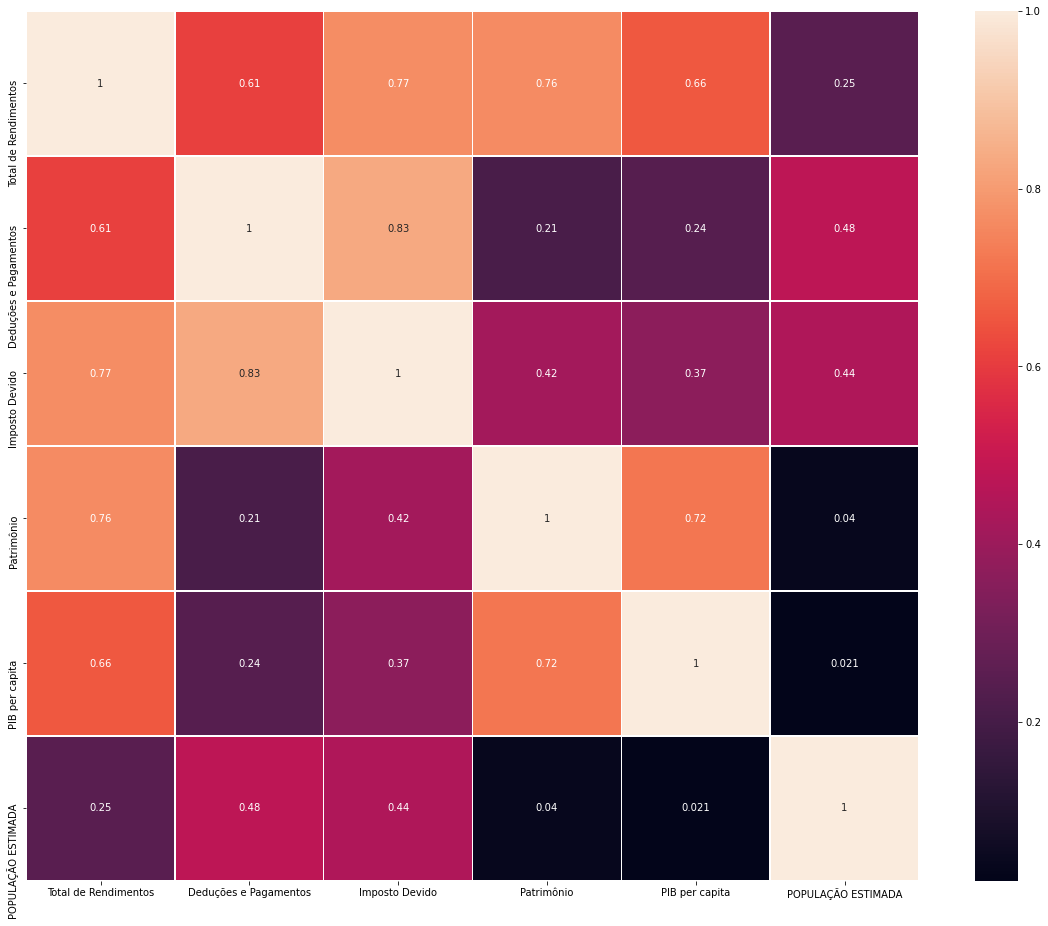

In [52]:
## Matriz de correlação de Spearman entre as variáveis
fig, ax = plt.subplots(figsize=(20,16))
corr_spearman = sns.heatmap(ds_completo_esp.corr(method='spearman'), annot=True, linewidths=.5)

In [53]:
### Execução dos algoritmos de Agrupamento ###
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from math import sqrt

In [54]:
## Transformando os dados em uma matriz

X = ds_completo_esp.values

## Normalizando os dados 
## Como os dados não possuem distribuição normal, será utilizado o MinMaxScaler
normalizador = MinMaxScaler()
Xnorm = normalizador.fit_transform(X)


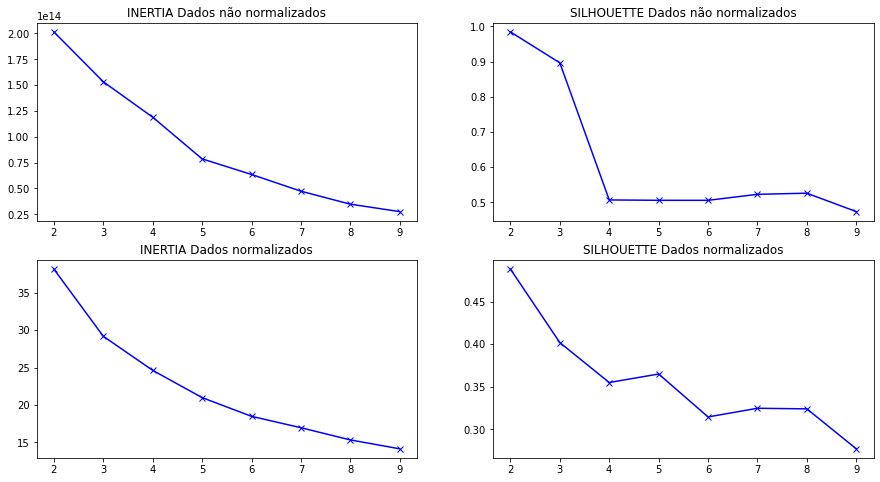

In [55]:
#### K-Means ######

lista_inertia = []
lista_silhueta = []

lista_inertianorm = []
lista_silhuetanorm = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=10).fit(X)
    lista_inertia.append(km.inertia_) 
    lista_silhueta.append(metrics.silhouette_score(X, km.labels_, metric='euclidean'))
        

    kmnorm = KMeans(n_clusters=i, random_state=10).fit(Xnorm)
    lista_inertianorm.append(kmnorm.inertia_) 
    lista_silhuetanorm.append(metrics.silhouette_score(Xnorm, kmnorm.labels_, metric='euclidean'))
    
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
ax[0,0].plot(np.arange(2,10), lista_inertia, 'bx-')
ax[0,0].set_title('INERTIA Dados não normalizados')
ax[0,1].plot(np.arange(2,10), lista_silhueta, 'bx-')
ax[0,1].set_title('SILHOUETTE Dados não normalizados')

ax[1,0].plot(np.arange(2,10), lista_inertianorm, 'bx-')
ax[1,0].set_title('INERTIA Dados normalizados')
ax[1,1].plot(np.arange(2,10), lista_silhuetanorm, 'bx-')
ax[1,1].set_title('SILHOUETTE Dados normalizados')

plt.show()

In [56]:
## Calculando o número ótimo dos clusters 
## Utilizando a métrica inertia, qual o ponto mais distante da linha que liga os pontos extremos da curva 
## (2 e 10 clusters)
def numero_otimo_clusters(inertia):
    x1, y1 = 2, inertia[0]
    x2, y2 = 10, inertia[len(inertia)-1]

    distances = []
    for i in range(len(inertia)):
        x0 = i+2
        y0 = inertia[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
n_clusters = numero_otimo_clusters(lista_inertia)
n_clusters_norm = numero_otimo_clusters(lista_inertianorm)
print("número ótimo de clusters dados não normalizados : %d" % n_clusters)
print("número ótimo de clusters dados normalizados : %d" % n_clusters_norm)

número ótimo de clusters dados não normalizados : 5
número ótimo de clusters dados normalizados : 5


In [57]:
## Melhor resultado para o modelo para os dados não normalizados 

km_modelo = KMeans(n_clusters=n_clusters, random_state=10).fit(X)

In [58]:
## Predizendo os clusters
kmeans_clusters_esp= []
kmeans_clusters_esp = pd.DataFrame(kmeans_clusters_esp)
kmeans_clusters_esp['clusters']=km_modelo.fit_predict(X)

In [59]:
## Tamanho dos clusters
kmeans_clusters_esp.value_counts()

clusters
3           3558
0           1958
4             22
1              2
2              1
dtype: int64

In [60]:
## Gerando os clusters
kmeans_clusters_esp.index = ds_completo_esp.index
cluster0_esp = kmeans_clusters_esp[kmeans_clusters_esp['clusters']==0]
cluster1_esp = kmeans_clusters_esp[kmeans_clusters_esp['clusters']==1]
cluster2_esp = kmeans_clusters_esp[kmeans_clusters_esp['clusters']==2]
cluster3_esp = kmeans_clusters_esp[kmeans_clusters_esp['clusters']==3]
cluster4_esp = kmeans_clusters_esp[kmeans_clusters_esp['clusters']==4]


In [61]:
cluster2_esp.head()

,clusters
APORE - GO,2


In [62]:
cluster1_esp.head()

,clusters
RIO DE JANEIRO - RJ,1
SAO PAULO - SP,1


In [63]:
cluster4_esp.head(22)

,clusters
BELEM - PA,4
BELO HORIZONTE - MG,4
BRASILIA - DF,4
CAMPINAS - SP,4
CAMPO GRANDE - MS,4
CURITIBA - PR,4
DUQUE DE CAXIAS - RJ,4
FORTALEZA - CE,4
GOIANIA - GO,4
GUARULHOS - SP,4


In [64]:
#### Visões sobre os clusters ###

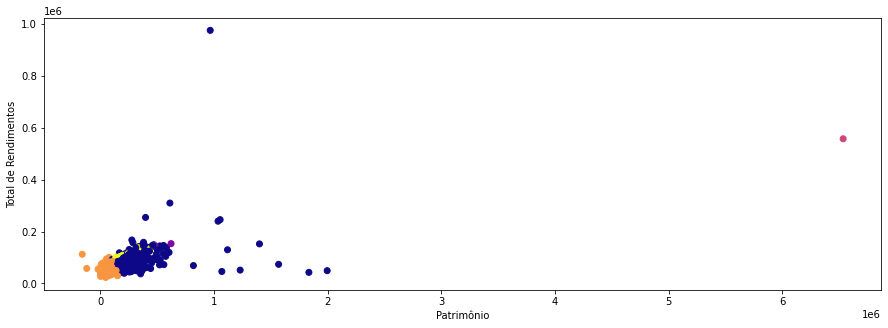

In [65]:
plt.figure(figsize=(15,5))
plt.xlabel('Patrimônio')
plt.ylabel('Total de Rendimentos')
plt.scatter(ds_completo_esp['Patrimônio'], ds_completo_esp['Total de Rendimentos'], c= kmeans_clusters_esp['clusters'],  cmap='plasma')

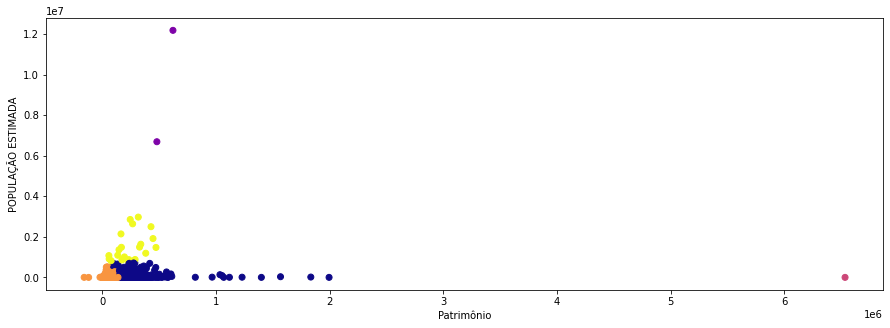

In [66]:
plt.figure(figsize=(15,5))
plt.xlabel('Patrimônio')
plt.ylabel('POPULAÇÃO ESTIMADA')
plt.scatter(ds_completo_esp['Patrimônio'], ds_completo_esp['POPULAÇÃO ESTIMADA'], c= kmeans_clusters_esp['clusters'], cmap='plasma')

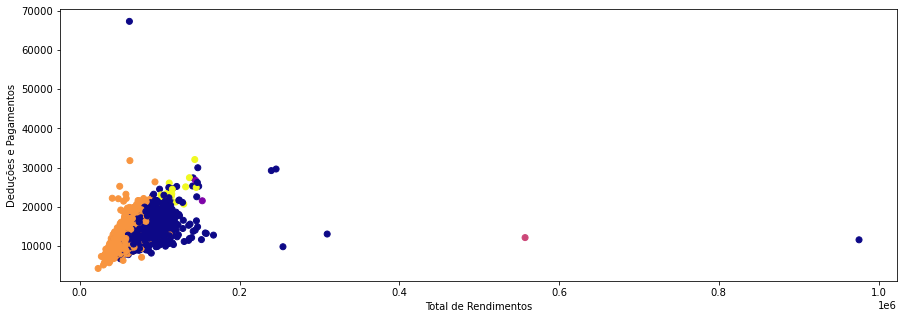

In [67]:
plt.figure(figsize=(15,5))
plt.xlabel('Total de Rendimentos')
plt.ylabel('Deduções e Pagamentos')
plt.scatter(ds_completo_esp['Total de Rendimentos'], ds_completo_esp['Deduções e Pagamentos'], c= kmeans_clusters_esp['clusters'], cmap='plasma')

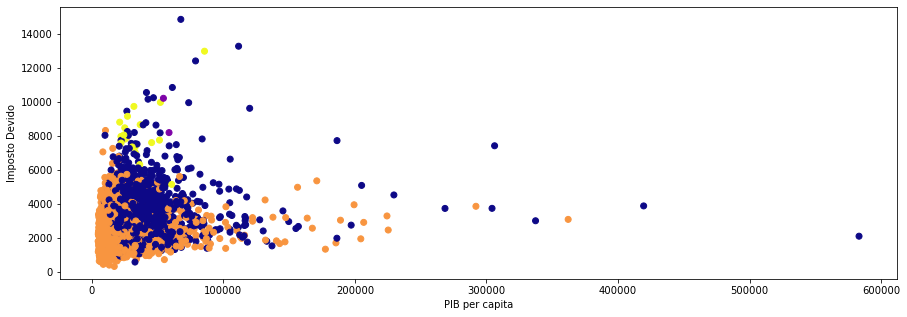

In [68]:
plt.figure(figsize=(15,5))
plt.xlabel('PIB per capita')
plt.ylabel('Imposto Devido')
plt.scatter(ds_completo_esp['PIB per capita'], ds_completo_esp['Imposto Devido'], c= kmeans_clusters_esp['clusters'], cmap='plasma')

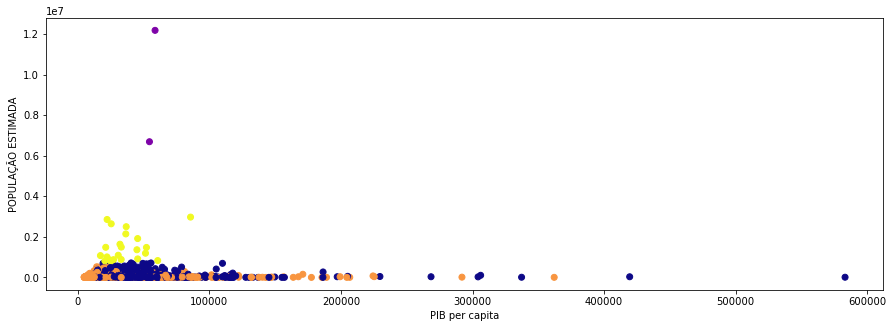

In [69]:
plt.figure(figsize=(15,5))
plt.xlabel('PIB per capita')
plt.ylabel('POPULAÇÃO ESTIMADA')
plt.scatter(ds_completo_esp['PIB per capita'], ds_completo_esp['POPULAÇÃO ESTIMADA'], c= kmeans_clusters_esp['clusters'], cmap='plasma')

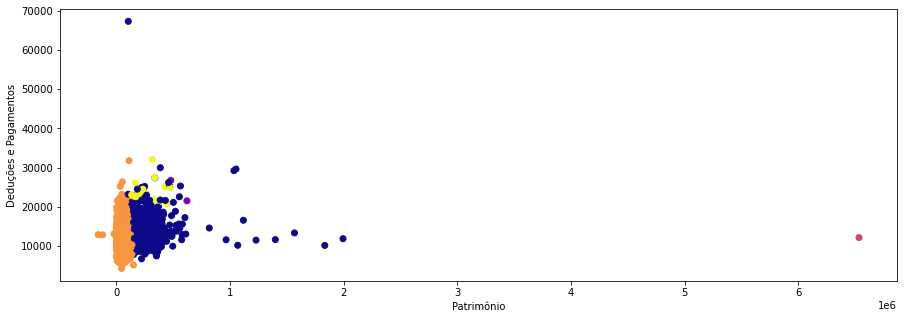

In [70]:
plt.figure(figsize=(15,5))
plt.xlabel('Patrimônio')
plt.ylabel('Deduções e Pagamentos')
plt.scatter(ds_completo_esp['Patrimônio'], ds_completo_esp['Deduções e Pagamentos'], c= kmeans_clusters_esp['clusters'], cmap='plasma')

In [71]:
#### Clusters dos Dados Normalizados ####

In [72]:
## Melhor resultado para o modelo para os dados não normalizados

km_modelo_norm = KMeans(n_clusters=n_clusters_norm, random_state=10).fit(Xnorm)

In [73]:
## Predizendo os clusters, para utilizar como cores para os gráficos
kmeans_clusters_esp_norm= []
kmeans_clusters_esp_norm = pd.DataFrame(kmeans_clusters_esp_norm)
kmeans_clusters_esp_norm['clusters']=km_modelo_norm.fit_predict(Xnorm)

In [74]:
## Tamanho dos clusters
kmeans_clusters_esp_norm.value_counts()

clusters
0           2369
2           2197
1            828
3             78
4             69
dtype: int64

In [75]:
## Gerando os clusters
kmeans_clusters_esp_norm.index = ds_completo_esp.index
cluster0_esp_norm = kmeans_clusters_esp_norm[kmeans_clusters_esp_norm['clusters']==0]
cluster1_esp_norm = kmeans_clusters_esp_norm[kmeans_clusters_esp_norm['clusters']==1]
cluster2_esp_norm = kmeans_clusters_esp_norm[kmeans_clusters_esp_norm['clusters']==2]
cluster3_esp_norm = kmeans_clusters_esp_norm[kmeans_clusters_esp_norm['clusters']==3]
cluster4_esp_norm = kmeans_clusters_esp_norm[kmeans_clusters_esp_norm['clusters']==4]
cluster5_esp_norm = kmeans_clusters_esp_norm[kmeans_clusters_esp_norm['clusters']==5]

In [76]:
#### Visões sobre os clusters ###

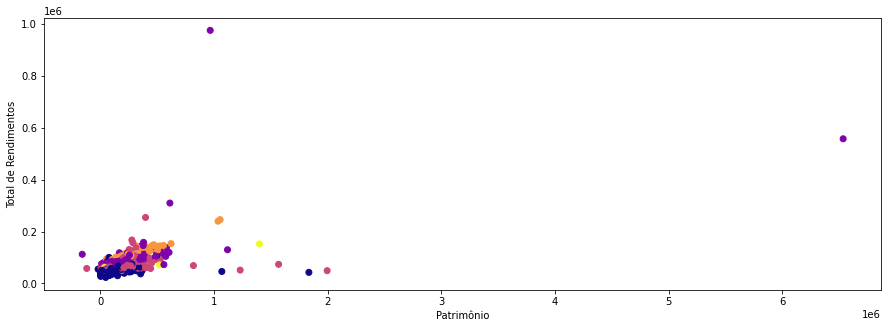

In [77]:
## Gráficos de clusters
plt.figure(figsize=(15,5))
plt.xlabel('Patrimônio')
plt.ylabel('Total de Rendimentos')
plt.scatter(ds_completo_esp['Patrimônio'], ds_completo_esp['Total de Rendimentos'], c= kmeans_clusters_esp_norm['clusters'],  cmap='plasma')


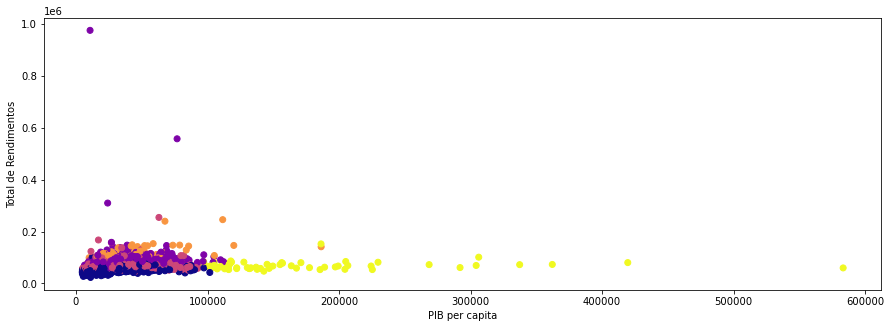

In [78]:
plt.figure(figsize=(15,5))
plt.xlabel('PIB per capita')
plt.ylabel('Total de Rendimentos')
plt.scatter(ds_completo_esp['PIB per capita'], ds_completo_esp['Total de Rendimentos'], c= kmeans_clusters_esp_norm['clusters'],  cmap='plasma')

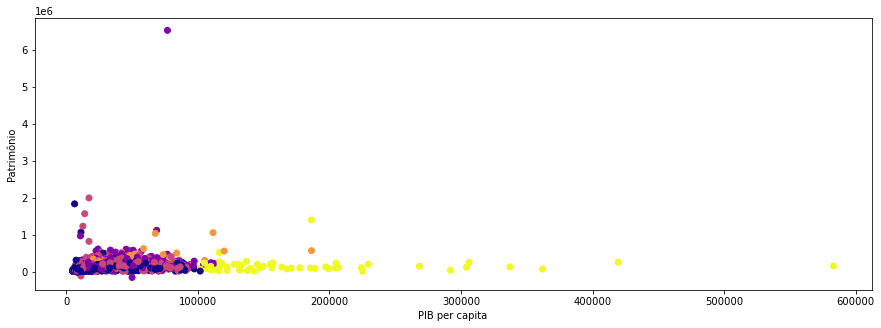

In [79]:
plt.figure(figsize=(15,5))
plt.xlabel('PIB per capita')
plt.ylabel('Patrimônio')
plt.scatter(ds_completo_esp['PIB per capita'], ds_completo_esp['Patrimônio'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')

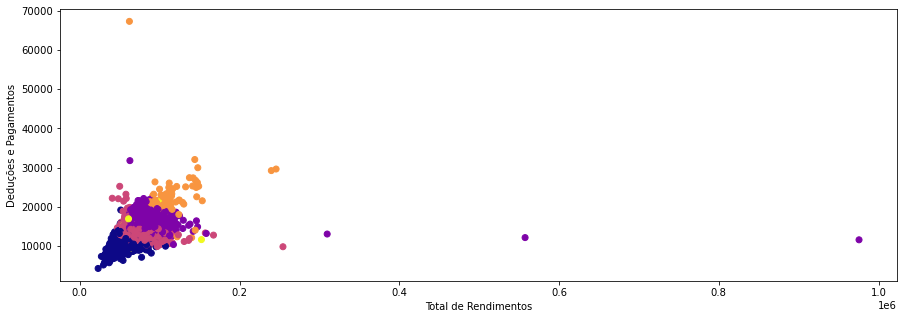

In [80]:
plt.figure(figsize=(15,5))
plt.xlabel('Total de Rendimentos')
plt.ylabel('Deduções e Pagamentos')
plt.scatter(ds_completo_esp['Total de Rendimentos'], ds_completo_esp['Deduções e Pagamentos'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')

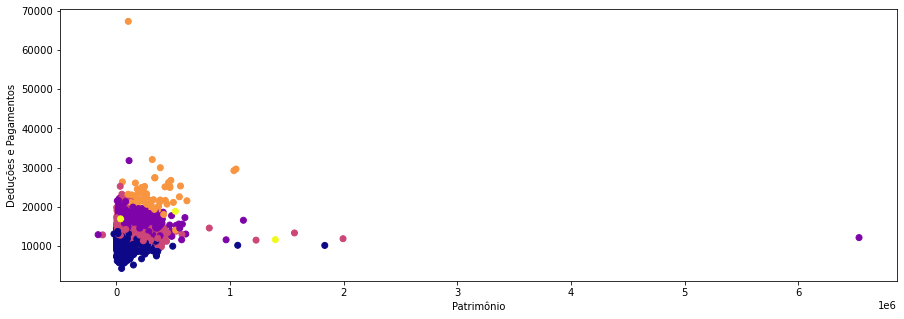

In [81]:
plt.figure(figsize=(15,5))
plt.xlabel('Patrimônio')
plt.ylabel('Deduções e Pagamentos')
plt.scatter(ds_completo_esp['Patrimônio'], ds_completo_esp['Deduções e Pagamentos'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')

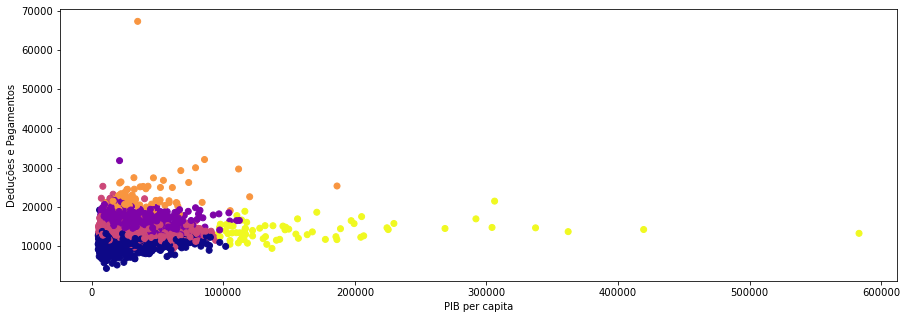

In [82]:
plt.figure(figsize=(15,5))
plt.xlabel('PIB per capita')
plt.ylabel('Deduções e Pagamentos')
plt.scatter(ds_completo_esp['PIB per capita'], ds_completo_esp['Deduções e Pagamentos'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')

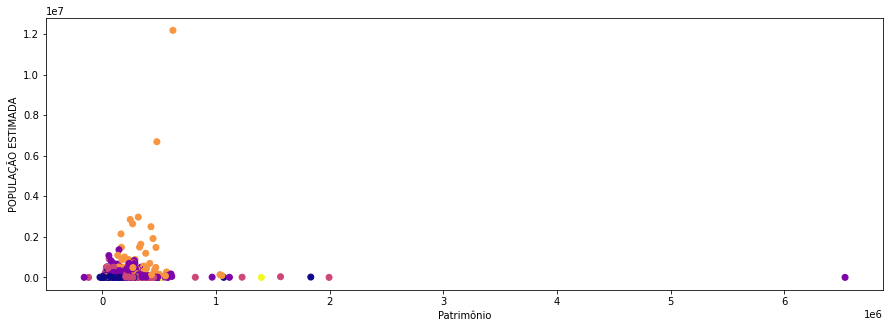

In [83]:
plt.figure(figsize=(15,5))
plt.xlabel('Patrimônio')
plt.ylabel('POPULAÇÃO ESTIMADA')
plt.scatter(ds_completo_esp['Patrimônio'], ds_completo_esp['POPULAÇÃO ESTIMADA'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')

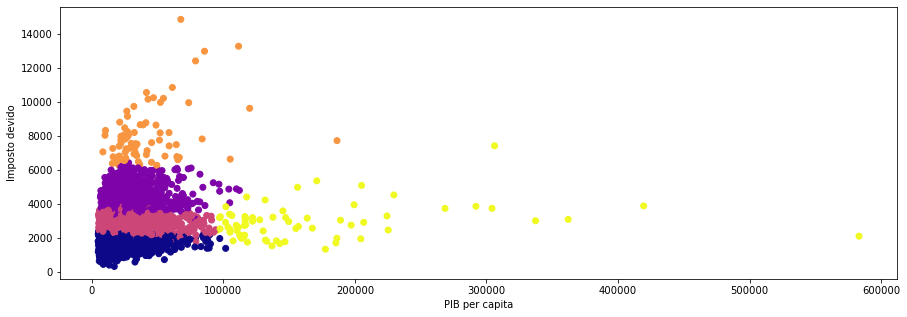

In [84]:
plt.figure(figsize=(15,5))
plt.xlabel('PIB per capita')
plt.ylabel('Imposto devido')
plt.scatter(ds_completo_esp['PIB per capita'], ds_completo_esp['Imposto Devido'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')


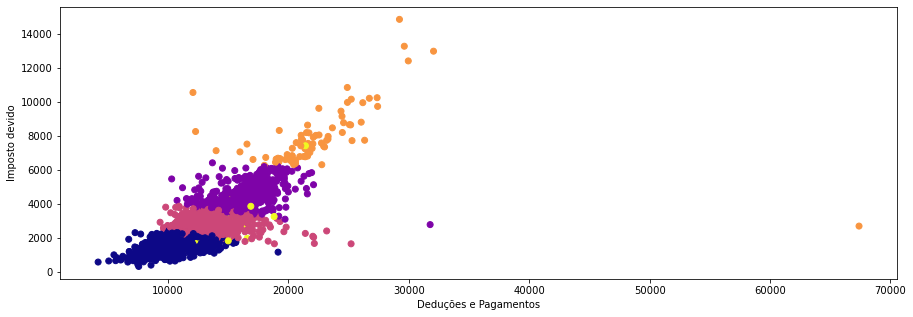

In [85]:
plt.figure(figsize=(15,5))
plt.xlabel('Deduções e Pagamentos')
plt.ylabel('Imposto devido')
plt.scatter(ds_completo_esp['Deduções e Pagamentos'], ds_completo_esp['Imposto Devido'], c= kmeans_clusters_esp_norm['clusters'], cmap='plasma')


In [86]:
### PCA - Redução de Componentes ###

In [87]:
from sklearn.decomposition import PCA

In [88]:
## Dados normalizados
pca_norm = PCA().fit(Xnorm)

[0.73515636 0.14028461 0.05239792 0.03581006 0.02459318 0.01175786]
[0.73515636 0.87544098 0.92783889 0.96364896 0.98824214 1.        ]


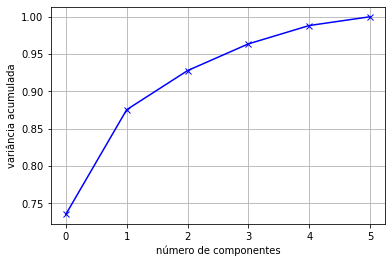

In [89]:
plt.plot(np.cumsum(pca_norm.explained_variance_ratio_), 'bx-')
plt.grid(True)
plt.xlabel('número de componentes')
plt.ylabel('variância acumulada')
print(pca_norm.explained_variance_ratio_)
print(np.cumsum(pca_norm.explained_variance_ratio_))

In [90]:
# Apenas 2 componentes já possuem 0.87 da variância acumulada

In [91]:
# Gerando as duas componentes do PCA
pca_norm = PCA(n_components=2)
pca_norm_components = pca_norm.fit_transform(Xnorm)

In [92]:
# Transformando em um Dataframe
df_pca_norm_components = pd.DataFrame(pca_norm_components)

In [93]:
## Transformando os pesos dos componentes em um DataFrame
df_pca_norm_components_pesos = pd.DataFrame(pca_norm.components_)
df_pca_norm_components_pesos.columns = ds_completo_esp.columns
df_pca_norm_components_pesos.head()

,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA
0,0.156049,0.400077,0.887180,0.075288,0.137587,0.062453
1,0.113359,-0.128705,-0.123366,0.150069,0.965727,-0.014721


In [94]:
## Como foi possível observar antes da redução do PCA,
## Deduções e Pagamentos, Imposto Devido  e PIB per capita tiveram os maiores pesos

In [95]:
df_pca_norm_components_pesos.to_excel('df_pca_norm_components_pesos.xlsx')

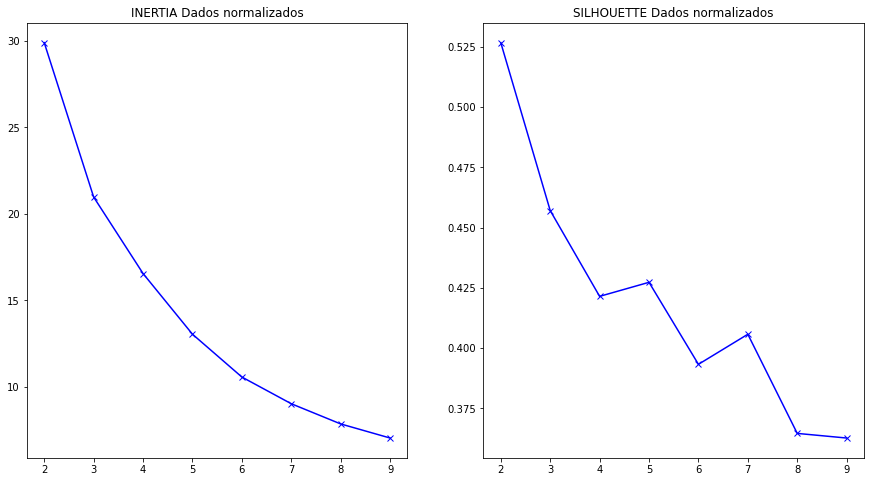

In [96]:
#### K-Means - PCA ######


lista_inertianorm = []
lista_silhuetanorm = []

for i in range(2,10):
    km_norm = KMeans(n_clusters=i, random_state=10).fit(pca_norm_components)
    lista_inertianorm.append(km_norm.inertia_) 
    lista_silhuetanorm.append(metrics.silhouette_score(pca_norm_components, km_norm.labels_, metric='euclidean'))
   

fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].plot(np.arange(2,10), lista_inertianorm, 'bx-')
ax[0].set_title('INERTIA Dados normalizados')

ax[1].plot(np.arange(2,10), lista_silhuetanorm, 'bx-')
ax[1].set_title('SILHOUETTE Dados normalizados')

plt.show()

In [97]:
## Calculando o número ótimo dos clusters 
## Utilizando a métrica inertia, qual o ponto mais distante da linha que liga os pontos extremos da curva 
## (2 e 10 clusters)
def numero_otimo_clusters(inertia):
    x1, y1 = 2, inertia[0]
    x2, y2 = 10, inertia[len(inertia)-1]

    distances = []
    for i in range(len(inertia)):
        x0 = i+2
        y0 = inertia[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

n_clusters_pca_norm = numero_otimo_clusters(lista_inertianorm)
print("número ótimo de clusters dados normalizados : %d" % n_clusters_pca_norm)

número ótimo de clusters dados normalizados : 5


In [98]:
## Melhor resultado, dados normalizados

km_modelo_pca_norm = KMeans(n_clusters=n_clusters_pca_norm, random_state=10).fit(pca_norm_components)

In [99]:
## Predizendo os clusters, para utilizar como cores para os gráficos
kmeans_clusters_pca_norm = []
kmeans_clusters_pca_norm = pd.DataFrame(kmeans_clusters_pca_norm)
kmeans_clusters_pca_norm['clusters']=km_modelo_pca_norm.fit_predict(pca_norm_components)

In [100]:
## Tamanho dos clusters
kmeans_clusters_pca_norm.value_counts()

clusters
2           2299
0           2227
1            863
4             84
3             68
dtype: int64

In [101]:
#### Visões sobre os clusters ###

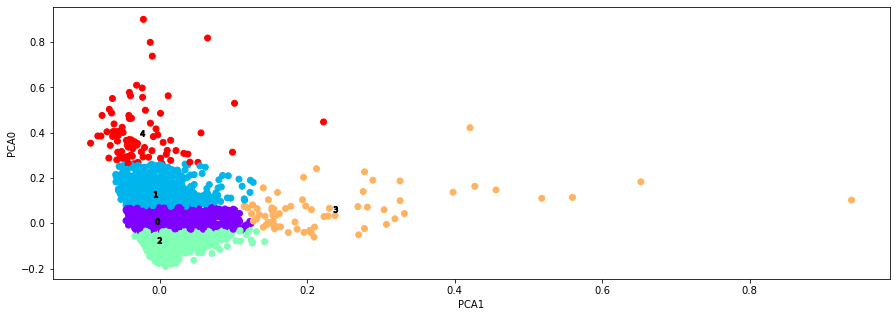

In [102]:
## Gráficos de clusters
## Os centroides foram marcados com o número do respectivo cluster
plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow')
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')


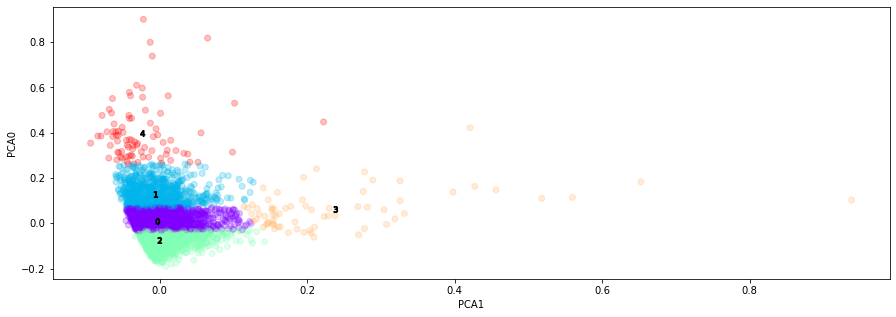

In [103]:
## Gráficos de clusters
## Versão com uma transparência de 25%

plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow', alpha = 0.25)
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')


In [104]:
# Observa-se que os clusters ficaram bem definidos e este modelo será utilizado para análise dos resultados

In [105]:
# Incluindo a métrica de "Carga Tributária" no dataset original, para auxiliar na análise

ds_completo_esp['Carga Tributária'] = 100*(ds_completo_esp['Imposto Devido']*ds_completo['Qtde Declarantes'])/(ds_completo_esp['PIB per capita']*ds_completo_esp['POPULAÇÃO ESTIMADA'])


In [106]:
ds_completo_esp.describe()

,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária
count,5541.000000,5541.000000,5541.000000,5.541000e+03,5541.000000,5.541000e+03,5541.000000
mean,63177.165365,12757.601640,2642.567979,1.234966e+05,23524.606001,3.746593e+04,1.116335
std,22463.351349,2731.014923,1218.314467,1.363367e+05,24279.265120,2.205125e+05,0.798270
min,22932.660000,4205.470000,325.800000,-1.589640e+05,4788.180000,7.860000e+02,0.025342
25%,50922.270000,11011.020000,1829.640000,4.315478e+04,9878.160000,5.454000e+03,0.586518
50%,59324.540000,12425.970000,2404.470000,1.036031e+05,17437.520000,1.159000e+04,0.915980
75%,71345.080000,14113.210000,3182.850000,1.777077e+05,28714.350000,2.529100e+04,1.390945
max,975468.400000,67387.550000,14840.230000,6.534198e+06,583171.850000,1.217687e+07,7.784220


In [107]:
ds_completo_esp.describe().to_excel('ds_completo_esp.describe.xlsx')

<Figure size 432x288 with 0 Axes>

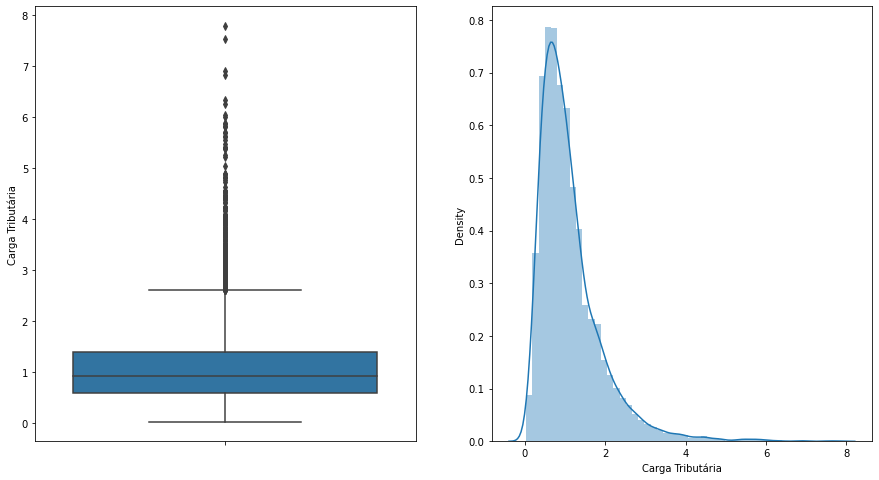

In [108]:
## Imprimindo os Boxplots e a Distribuição da "Carga Tributária"

figure = plt.figure()
figure, axs = plt.subplots(1,2, figsize=(15,8))
sns.boxplot(y=ds_completo_esp['Carga Tributária'], ax=axs[0]) 
sns.distplot(ds_completo_esp['Carga Tributária'], ax=axs[1])
plt.show()  
figure.savefig('boxplot e distribuição'+ " " + 'Carga Tributária' + '.png' )

In [109]:
## Criando uma coluna com o Porte populacional dos municípios
## para auxiliar na análise
import sys
ds_completo_esp['Porte Município']=pd.cut(ds_completo_esp['POPULAÇÃO ESTIMADA'], bins=[0, 20000, 100000, sys.maxsize],labels=['pequeno porte','médio porte','grande porte'])

In [110]:
ds_completo_esp['Porte Município'].value_counts()

pequeno porte    3791
médio porte      1434
grande porte      316
Name: Porte Município, dtype: int64

In [111]:
## Recuperando a informação da Atividade com maior valor adicionado ao PIB
## para auxiliar na análise

ds_IBGE3 = ds_IBGE[['Atividade com maior valor adicionado bruto']]

In [112]:
ds_completo_esp = ds_completo_esp.merge(ds_IBGE3, left_index=True, right_index=True)

In [113]:
ds_completo_esp['Atividade com maior valor adicionado bruto'].value_counts()

Administração, defesa, educação e saúde públicas e seguridade social                    2724
Demais serviços                                                                         1578
Agricultura, inclusive apoio à agricultura e a pós colheita                              622
Indústrias de transformação                                                              268
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação     110
Pecuária, inclusive apoio à pecuária                                                      90
Indústrias extrativas                                                                     65
Comércio e reparação de veículos automotores e motocicletas                               45
Produção florestal, pesca e aquicultura                                                   33
Construção                                                                                 6
Name: Atividade com maior valor adicionado bruto, dtype: int64

In [114]:
ds_completo_esp.to_excel('ds_completo_esp.xlsx')

In [115]:
## Gerando os clusters
kmeans_clusters_pca_norm.index = ds_completo_esp.index
cluster0_pca_norm = kmeans_clusters_pca_norm[kmeans_clusters_pca_norm['clusters']==0]
cluster1_pca_norm = kmeans_clusters_pca_norm[kmeans_clusters_pca_norm['clusters']==1]
cluster2_pca_norm = kmeans_clusters_pca_norm[kmeans_clusters_pca_norm['clusters']==2]
cluster3_pca_norm = kmeans_clusters_pca_norm[kmeans_clusters_pca_norm['clusters']==3]
cluster4_pca_norm = kmeans_clusters_pca_norm[kmeans_clusters_pca_norm['clusters']==4]

In [116]:
## Incluindo os dados originais nos clusters, para análise

cluster0_pca_norm = cluster0_pca_norm.merge(ds_completo_esp, left_index=True, right_index=True)
cluster1_pca_norm = cluster1_pca_norm.merge(ds_completo_esp, left_index=True, right_index=True)
cluster2_pca_norm = cluster2_pca_norm.merge(ds_completo_esp, left_index=True, right_index=True)
cluster3_pca_norm = cluster3_pca_norm.merge(ds_completo_esp, left_index=True, right_index=True)
cluster4_pca_norm = cluster4_pca_norm.merge(ds_completo_esp, left_index=True, right_index=True)

In [117]:
## Salvando os clusters para Excel

cluster0_pca_norm.to_excel('cluster0_pca_norm.xlsx')
cluster1_pca_norm.to_excel('cluster1_pca_norm.xlsx')
cluster2_pca_norm.to_excel('cluster2_pca_norm.xlsx')
cluster3_pca_norm.to_excel('cluster3_pca_norm.xlsx')
cluster4_pca_norm.to_excel('cluster4_pca_norm.xlsx')

In [118]:
## Salvando os sumários estatísticos dos clusters para Excel

cluster0_pca_norm.describe().to_excel('cluster0_pca_norm_describe.xlsx')
cluster1_pca_norm.describe().to_excel('cluster1_pca_norm_describe.xlsx')
cluster2_pca_norm.describe().to_excel('cluster2_pca_norm_describe.xlsx')
cluster3_pca_norm.describe().to_excel('cluster3_pca_norm_describe.xlsx')
cluster4_pca_norm.describe().to_excel('cluster4_pca_norm_describe.xlsx')

In [119]:
## Gerando as informações de cada cluster para auxiliar na análise
## Sumário estatístico, distribuição do Porte populacional e da Atividade econômica mais relevante

In [120]:
# Cluster 0
cluster0_pca_norm.describe()

,clusters,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária
count,2227.0,2227.000000,2227.000000,2227.000000,2.227000e+03,2227.000000,2227.000000,2227.000000
mean,0.0,64884.228994,13191.165613,2778.293920,1.281774e+05,22505.260894,23521.831612,1.151070
std,0.0,12491.546797,1414.387910,390.495145,1.037348e+05,15411.297612,40847.961209,0.503302
min,0.0,40632.620000,9352.290000,1655.450000,-1.194169e+05,4970.450000,1088.000000,0.102835
25%,0.0,56340.375000,12306.185000,2458.390000,4.996538e+04,10760.300000,6227.500000,0.802821
50%,0.0,62467.430000,13069.620000,2732.810000,1.145803e+05,18437.460000,13465.000000,1.080107
75%,0.0,70780.225000,14006.370000,3082.600000,1.852432e+05,29193.685000,25957.500000,1.403771
max,0.0,254322.030000,25211.200000,3861.400000,1.995368e+06,95518.160000,565957.000000,3.966616


In [121]:
cluster0_pca_norm['Porte Município'].value_counts()

pequeno porte    1476
médio porte       686
grande porte       65
Name: Porte Município, dtype: int64

In [122]:
cluster0_pca_norm['Atividade com maior valor adicionado bruto'].value_counts()

Administração, defesa, educação e saúde públicas e seguridade social                    977
Demais serviços                                                                         721
Agricultura, inclusive apoio à agricultura e a pós colheita                             270
Indústrias de transformação                                                             132
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação     41
Pecuária, inclusive apoio à pecuária                                                     34
Indústrias extrativas                                                                    18
Produção florestal, pesca e aquicultura                                                  16
Comércio e reparação de veículos automotores e motocicletas                              15
Construção                                                                                3
Name: Atividade com maior valor adicionado bruto, dtype: int64

In [123]:
# Cluster 1
cluster1_pca_norm.describe()

,clusters,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária
count,863.0,863.000000,863.000000,863.000000,8.630000e+02,863.000000,8.630000e+02,863.000000
mean,1.0,83629.862399,15969.283975,4317.943546,1.863893e+05,30213.627428,7.370983e+04,2.022889
std,0.0,34413.766238,1794.649302,653.272049,1.069268e+05,17158.255700,1.213172e+05,0.828286
min,1.0,53579.730000,10312.500000,1887.450000,-1.589640e+05,6534.750000,7.860000e+02,0.214086
25%,1.0,71468.015000,14818.540000,3789.020000,1.133008e+05,17440.175000,1.408000e+04,1.443978
50%,1.0,81601.290000,15799.840000,4145.530000,1.791084e+05,26332.850000,3.348100e+04,1.920212
75%,1.0,90963.385000,17062.425000,4713.710000,2.460624e+05,39102.400000,8.330500e+04,2.462687
max,1.0,975468.400000,31774.200000,6413.010000,1.118938e+06,112159.240000,1.365899e+06,6.334495


In [124]:
cluster1_pca_norm['Porte Município'].value_counts()

médio porte      396
pequeno porte    292
grande porte     175
Name: Porte Município, dtype: int64

In [125]:
cluster1_pca_norm['Atividade com maior valor adicionado bruto'].value_counts()

Demais serviços                                                                         540
Administração, defesa, educação e saúde públicas e seguridade social                    180
Agricultura, inclusive apoio à agricultura e a pós colheita                              47
Indústrias de transformação                                                              38
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação     23
Indústrias extrativas                                                                    14
Comércio e reparação de veículos automotores e motocicletas                               9
Pecuária, inclusive apoio à pecuária                                                      6
Produção florestal, pesca e aquicultura                                                   4
Construção                                                                                2
Name: Atividade com maior valor adicionado bruto, dtype: int64

In [126]:
# Cluster 2
cluster2_pca_norm.describe()

,clusters,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária
count,2299.0,2299.000000,2299.000000,2299.000000,2.299000e+03,2299.000000,2299.000000,2299.000000
mean,2.0,51603.770609,10748.221074,1683.553945,8.521952e+04,17124.963158,12159.913006,0.659972
std,0.0,9535.124730,1361.427136,370.862794,7.848855e+04,13000.726452,18320.261044,0.318704
min,2.0,22932.660000,4205.470000,325.800000,-1.978457e+04,4788.180000,836.000000,0.025342
25%,2.0,45372.710000,9923.575000,1433.535000,3.026526e+04,8389.240000,4279.500000,0.428113
50%,2.0,49977.120000,10804.230000,1734.020000,6.408541e+04,11985.440000,7407.000000,0.611343
75%,2.0,56105.405000,11630.980000,1976.560000,1.258946e+05,21688.290000,14067.500000,0.828794
max,2.0,107332.050000,19148.070000,2450.430000,1.834740e+06,101744.850000,366519.000000,2.848109


In [127]:
cluster2_pca_norm['Porte Município'].value_counts()

pequeno porte    1974
médio porte       313
grande porte       12
Name: Porte Município, dtype: int64

In [128]:
cluster2_pca_norm['Atividade com maior valor adicionado bruto'].value_counts()

Administração, defesa, educação e saúde públicas e seguridade social                    1561
Agricultura, inclusive apoio à agricultura e a pós colheita                              288
Demais serviços                                                                          243
Indústrias de transformação                                                               80
Pecuária, inclusive apoio à pecuária                                                      50
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação      31
Comércio e reparação de veículos automotores e motocicletas                               16
Indústrias extrativas                                                                     16
Produção florestal, pesca e aquicultura                                                   13
Construção                                                                                 1
Name: Atividade com maior valor adicionado bruto, dtype: int64

In [129]:
# Cluster 3
cluster3_pca_norm.describe()

,clusters,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária
count,68.0,68.000000,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000
mean,3.0,76178.633676,13861.624706,2925.543235,2.559814e+05,165564.741765,28756.573529,0.281596
std,0.0,60951.111196,2204.904270,1029.274173,7.919150e+05,85984.408499,40745.472101,0.174622
min,3.0,47120.960000,9333.010000,1339.790000,7.308070e+03,76880.470000,1668.000000,0.032449
25%,3.0,60087.342500,12302.530000,2153.412500,8.955720e+04,114360.460000,5458.000000,0.151252
50%,3.0,66997.305000,13764.290000,2845.145000,1.353089e+05,134966.780000,13011.000000,0.232137
75%,3.0,74733.787500,15016.467500,3250.142500,1.984746e+05,186968.187500,34107.250000,0.381932
max,3.0,557430.290000,21421.330000,7414.130000,6.534198e+06,583171.850000,215895.000000,0.831696


In [130]:
cluster3_pca_norm['Porte Município'].value_counts()

pequeno porte    41
médio porte      22
grande porte      5
Name: Porte Município, dtype: int64

In [131]:
cluster3_pca_norm['Atividade com maior valor adicionado bruto'].value_counts()

Indústrias de transformação                                                             16
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação    15
Agricultura, inclusive apoio à agricultura e a pós colheita                             15
Indústrias extrativas                                                                   12
Comércio e reparação de veículos automotores e motocicletas                              5
Demais serviços                                                                          5
Name: Atividade com maior valor adicionado bruto, dtype: int64

In [132]:
# Cluster 4
cluster4_pca_norm.describe()

,clusters,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária
count,84.0,84.000000,84.000000,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000
mean,4.0,114020.337500,22367.881786,7849.950833,2.936136e+05,41994.912262,7.344397e+05,4.047641
std,0.0,28065.269453,6073.420665,1795.521523,1.748286e+05,27733.236750,1.584010e+06,1.471316
min,4.0,62099.740000,12080.810000,2697.170000,3.427580e+04,8409.990000,2.378000e+03,1.102998
25%,4.0,97158.127500,20053.417500,6718.150000,1.778960e+05,24548.910000,7.754200e+04,3.035382
50%,4.0,110619.525000,21597.075000,7497.825000,2.669637e+05,33031.975000,2.861800e+05,3.910688
75%,4.0,122372.297500,23836.857500,8352.412500,3.677775e+05,51973.687500,6.603378e+05,5.081253
max,4.0,245724.900000,67387.550000,14840.230000,1.053879e+06,186382.330000,1.217687e+07,7.784220


In [133]:
cluster4_pca_norm['Porte Município'].value_counts()

grande porte     59
médio porte      17
pequeno porte     8
Name: Porte Município, dtype: int64

In [134]:
cluster4_pca_norm['Atividade com maior valor adicionado bruto'].value_counts()

Demais serviços                                                         69
Administração, defesa, educação e saúde públicas e seguridade social     6
Indústrias extrativas                                                    5
Agricultura, inclusive apoio à agricultura e a pós colheita              2
Indústrias de transformação                                              2
Name: Atividade com maior valor adicionado bruto, dtype: int64

In [135]:
## Calculando a distância dos pontos para os Centróides ##

distancias_centroides = km_modelo_pca_norm.transform(pca_norm_components)
distancias_centroides = pd.DataFrame(distancias_centroides)
distancias_centroides.index = ds_completo_esp.index 
distancias_centroides.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']
distancias_centroides.head() 

,cluster0,cluster1,cluster2,cluster3,cluster4
ABADIA DE GOIAS - GO,0.067082,0.183430,0.026852,0.250256,0.452916
ABADIA DOS DOURADOS - MG,0.135345,0.252713,0.050218,0.289475,0.522305
ABADIANIA - GO,0.032873,0.090485,0.116280,0.258019,0.358379
ABAETE - MG,0.067567,0.051116,0.153720,0.249612,0.319944
ABAETETUBA - PA,0.047177,0.092884,0.123365,0.276731,0.356069


In [136]:
## Calculando o somatório das distâncias de cada cluster, para avaliar o nível de compactação

In [137]:
# Cluster 0
distancias_centroides['cluster0'].sum()

441.10945277125995

In [138]:
# Cluster 1
distancias_centroides['cluster1'].sum()

825.5651350320251

In [139]:
# Cluster 2
distancias_centroides['cluster2'].sum()

516.0920466128352

In [140]:
# Cluster 3
distancias_centroides['cluster3'].sum()

1450.6958700224445

In [141]:
# Cluster 4
distancias_centroides['cluster4'].sum()

2226.436191839172

In [142]:
## Calculando a métrica Silhouette para cada cluster

In [143]:
# Cluster 0
metrics.silhouette_score(pca_norm_components, km_modelo_pca_norm.labels_ == 0, metric='euclidean')

0.13343397360097564

In [144]:
# Cluster 1
metrics.silhouette_score(pca_norm_components, km_modelo_pca_norm.labels_ == 1, metric='euclidean')

0.4653025423978836

In [145]:
# Cluster 2
metrics.silhouette_score(pca_norm_components, km_modelo_pca_norm.labels_ == 2, metric='euclidean')

0.37788126651372

In [146]:
# Cluster 3
metrics.silhouette_score(pca_norm_components, km_modelo_pca_norm.labels_ == 3, metric='euclidean')

0.6100997250733184

In [147]:
# Cluster 4
metrics.silhouette_score(pca_norm_components, km_modelo_pca_norm.labels_ == 4, metric='euclidean')

0.7267106556562622

In [148]:
## Criando dataframes para as distâncias de cada cluster ##
## Para a extração dos Outliers ##
distancias_centroides = distancias_centroides.merge(kmeans_clusters_pca_norm, left_index=True  , right_index=True)
dist_cluster0_pca_norm = distancias_centroides[distancias_centroides['clusters']==0]
dist_cluster1_pca_norm = distancias_centroides[distancias_centroides['clusters']==1]
dist_cluster2_pca_norm = distancias_centroides[distancias_centroides['clusters']==2]
dist_cluster3_pca_norm = distancias_centroides[distancias_centroides['clusters']==3]
dist_cluster4_pca_norm = distancias_centroides[distancias_centroides['clusters']==4]

In [149]:
distancias_centroides.to_excel('distancias_centroides.xlsx')

In [150]:
## Calculando o percentil 99, para extrair os Outliers dos clusters
distancias_centroides_describe0 = dist_cluster0_pca_norm.describe(percentiles=[.99])
distancias_centroides_describe1 = dist_cluster1_pca_norm.describe(percentiles=[.99])
distancias_centroides_describe2 = dist_cluster2_pca_norm.describe(percentiles=[.99])
distancias_centroides_describe3 = dist_cluster3_pca_norm.describe(percentiles=[.99])
distancias_centroides_describe4 = dist_cluster4_pca_norm.describe(percentiles=[.99])

In [151]:
limite_max_cluster0 = distancias_centroides_describe0.loc['99%', 'cluster0']
limite_max_cluster1 = distancias_centroides_describe1.loc['99%', 'cluster1']
limite_max_cluster2 = distancias_centroides_describe2.loc['99%', 'cluster2']
limite_max_cluster3 = distancias_centroides_describe3.loc['99%', 'cluster3']
limite_max_cluster4 = distancias_centroides_describe4.loc['99%', 'cluster4']

In [152]:
dist_cluster0_pca_norm_max = dist_cluster0_pca_norm[dist_cluster0_pca_norm['cluster0'] >= limite_max_cluster0 ]
dist_cluster0_pca_norm_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, AGUA CLARA - MS to VARGEM BONITA - SC
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cluster0  23 non-null     float64
 1   cluster1  23 non-null     float64
 2   cluster2  23 non-null     float64
 3   cluster3  23 non-null     float64
 4   cluster4  23 non-null     float64
 5   clusters  23 non-null     int32  
dtypes: float64(5), int32(1)
memory usage: 1.2+ KB


In [153]:
dist_cluster1_pca_norm_max = dist_cluster1_pca_norm[dist_cluster1_pca_norm['cluster1'] >= limite_max_cluster1 ]
dist_cluster1_pca_norm_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, CRUZ ALTA - RS to SAO JOSE DA BARRA - MG
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cluster0  9 non-null      float64
 1   cluster1  9 non-null      float64
 2   cluster2  9 non-null      float64
 3   cluster3  9 non-null      float64
 4   cluster4  9 non-null      float64
 5   clusters  9 non-null      int32  
dtypes: float64(5), int32(1)
memory usage: 468.0+ bytes


In [154]:
dist_cluster2_pca_norm_max = dist_cluster2_pca_norm[dist_cluster2_pca_norm['cluster2'] >= limite_max_cluster2 ]
dist_cluster2_pca_norm_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, AGUA SANTA - RS to VALE DE SAO DOMINGOS - MT
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cluster0  23 non-null     float64
 1   cluster1  23 non-null     float64
 2   cluster2  23 non-null     float64
 3   cluster3  23 non-null     float64
 4   cluster4  23 non-null     float64
 5   clusters  23 non-null     int32  
dtypes: float64(5), int32(1)
memory usage: 1.2+ KB


In [155]:
dist_cluster3_pca_norm_max = dist_cluster3_pca_norm[dist_cluster3_pca_norm['cluster3'] >= limite_max_cluster3 ]
dist_cluster3_pca_norm_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, PRESIDENTE KENNEDY - ES to PRESIDENTE KENNEDY - ES
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cluster0  1 non-null      float64
 1   cluster1  1 non-null      float64
 2   cluster2  1 non-null      float64
 3   cluster3  1 non-null      float64
 4   cluster4  1 non-null      float64
 5   clusters  1 non-null      int32  
dtypes: float64(5), int32(1)
memory usage: 52.0+ bytes


In [156]:
dist_cluster4_pca_norm_max = dist_cluster4_pca_norm[dist_cluster4_pca_norm['cluster4'] >= limite_max_cluster4 ]
dist_cluster4_pca_norm_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, SANTANA DE PARNAIBA - SP to SANTANA DE PARNAIBA - SP
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cluster0  1 non-null      float64
 1   cluster1  1 non-null      float64
 2   cluster2  1 non-null      float64
 3   cluster3  1 non-null      float64
 4   cluster4  1 non-null      float64
 5   clusters  1 non-null      int32  
dtypes: float64(5), int32(1)
memory usage: 52.0+ bytes


In [157]:
## Concatenando os Outliers em um único Dataframe

dist_cluster_pca_norm_max = []
dist_cluster_pca_norm_max = pd.DataFrame(dist_cluster_pca_norm_max)
dist_cluster_pca_norm_max = pd.concat([dist_cluster0_pca_norm_max, dist_cluster1_pca_norm_max, dist_cluster2_pca_norm_max ,dist_cluster3_pca_norm_max ,dist_cluster4_pca_norm_max])
dist_cluster_pca_norm_max.info()
dist_cluster_pca_norm_max.head()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, AGUA CLARA - MS to SANTANA DE PARNAIBA - SP
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cluster0  57 non-null     float64
 1   cluster1  57 non-null     float64
 2   cluster2  57 non-null     float64
 3   cluster3  57 non-null     float64
 4   cluster4  57 non-null     float64
 5   clusters  57 non-null     int32  
dtypes: float64(5), int32(1)
memory usage: 2.9+ KB


,cluster0,cluster1,cluster2,cluster3,cluster4,clusters
AGUA CLARA - MS,0.115161,0.124633,0.170346,0.137353,0.357433,0
ALMIRANTE TAMANDARE DO SUL - RS,0.111619,0.165607,0.137456,0.139452,0.410938,0
ALTO TAQUARI - MT,0.107321,0.132311,0.156692,0.140017,0.371723,0
ANDRE DA ROCHA - RS,0.109109,0.159619,0.139161,0.139701,0.404568,0
ANTONIO CARLOS - SC,0.105608,0.114526,0.164792,0.148763,0.352631,0


In [158]:
## Incluindo os valores originais nos Outliers para análise
dist_cluster_pca_norm_max_merge = dist_cluster_pca_norm_max.merge(ds_completo_esp, left_index=True  , right_index=True, how ='left')
dist_cluster_pca_norm_max_merge.info()
dist_cluster_pca_norm_max_merge.head()


<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, AGUA CLARA - MS to SANTANA DE PARNAIBA - SP
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   cluster0                                    57 non-null     float64 
 1   cluster1                                    57 non-null     float64 
 2   cluster2                                    57 non-null     float64 
 3   cluster3                                    57 non-null     float64 
 4   cluster4                                    57 non-null     float64 
 5   clusters                                    57 non-null     int32   
 6   Total de Rendimentos                        57 non-null     float64 
 7   Deduções e Pagamentos                       57 non-null     float64 
 8   Imposto Devido                              57 non-null     float64 
 9   Patrimônio                                  57 

,cluster0,cluster1,cluster2,cluster3,cluster4,clusters,Total de Rendimentos,Deduções e Pagamentos,Imposto Devido,Patrimônio,PIB per capita,POPULAÇÃO ESTIMADA,Carga Tributária,Porte Município,Atividade com maior valor adicionado bruto
AGUA CLARA - MS,0.115161,0.124633,0.170346,0.137353,0.357433,0,72335.37,13434.93,3322.19,88986.66,87307.89,15257,0.469875,pequeno porte,"Eletricidade e gás, água, esgoto, atividades d..."
ALMIRANTE TAMANDARE DO SUL - RS,0.111619,0.165607,0.137456,0.139452,0.410938,0,82462.10,10315.00,2732.81,216952.59,83157.15,1979,0.471609,pequeno porte,"Agricultura, inclusive apoio à agricultura e a..."
ALTO TAQUARI - MT,0.107321,0.132311,0.156692,0.140017,0.371723,0,78596.53,14252.16,2966.24,128118.04,84436.00,10557,0.496819,pequeno porte,"Agricultura, inclusive apoio à agricultura e a..."
ANDRE DA ROCHA - RS,0.109109,0.159619,0.139161,0.139701,0.404568,0,75412.67,11940.43,2671.18,259536.05,83234.43,1324,0.416908,pequeno porte,"Agricultura, inclusive apoio à agricultura e a..."
ANTONIO CARLOS - SC,0.105608,0.114526,0.164792,0.148763,0.352631,0,83159.01,13589.47,3306.77,223491.02,78006.01,8411,0.768092,pequeno porte,Demais serviços


In [159]:
dist_cluster_pca_norm_max_merge.to_excel('dist_cluster_pca_norm_max_merge.xlsx')

In [160]:
dist_cluster_pca_norm_max_merge.describe().to_excel('dist_cluster_pca_norm_max_merge_describe.xlsx')

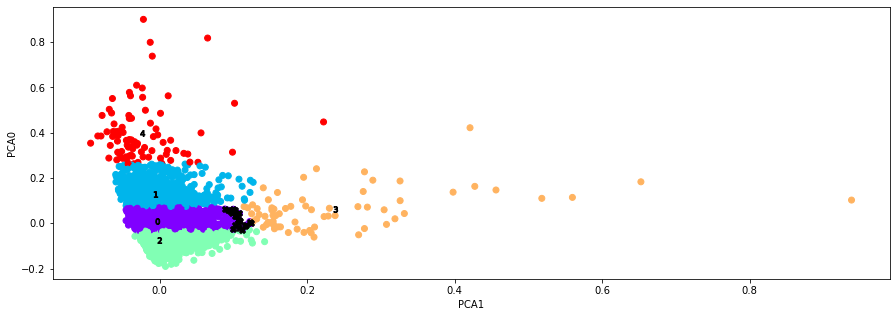

In [161]:
## Gráficos de clusters com os Outliers
# Cluster 0

df_pca_norm_components2 = df_pca_norm_components
df_pca_norm_components2.index = ds_completo_esp.index

plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow', alpha=1)
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')
plt.scatter(df_pca_norm_components2.loc[dist_cluster0_pca_norm_max.index, 1], df_pca_norm_components2.loc[dist_cluster0_pca_norm_max.index, 0], color='black', marker='X')

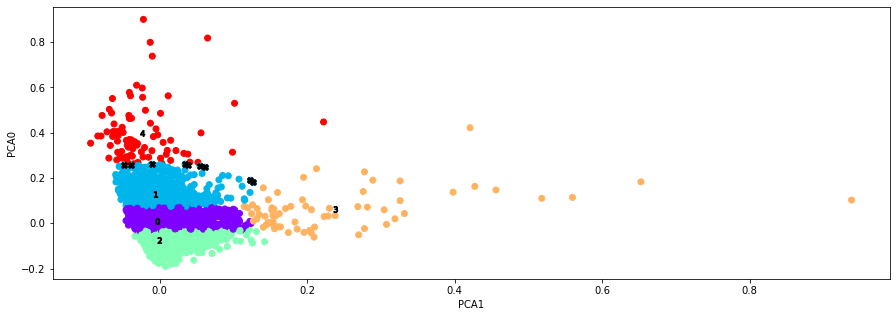

In [162]:
## Gráficos de clusters com os Outliers
# Cluster 1

plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow', alpha=1)
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')
plt.scatter(df_pca_norm_components2.loc[dist_cluster1_pca_norm_max.index, 1], df_pca_norm_components2.loc[dist_cluster1_pca_norm_max.index, 0], color='black', marker='X')

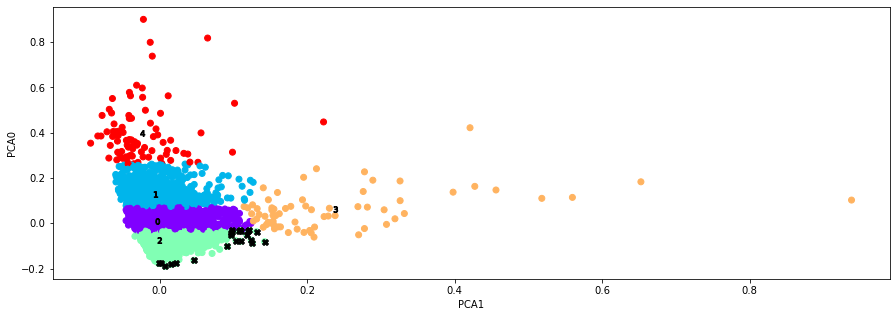

In [163]:
## Gráficos de clusters com os Outliers
# Cluster 2

plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow', alpha=1)
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')
plt.scatter(df_pca_norm_components2.loc[dist_cluster2_pca_norm_max.index, 1], df_pca_norm_components2.loc[dist_cluster2_pca_norm_max.index, 0], color='black', marker='X')

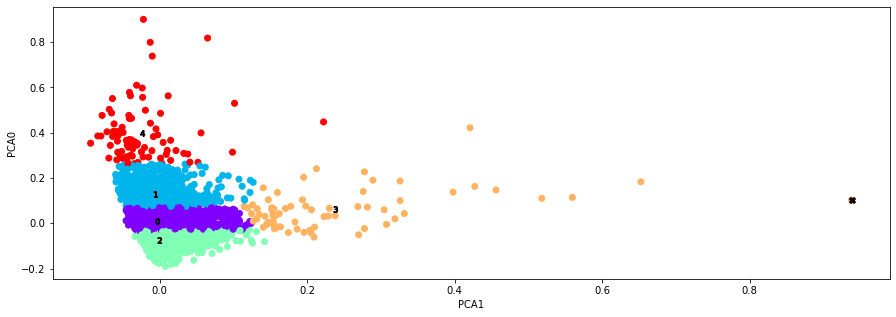

In [164]:
## Gráficos de clusters com os Outliers
# Cluster 3

plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow', alpha=1)
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')
plt.scatter(df_pca_norm_components2.loc[dist_cluster3_pca_norm_max.index, 1], df_pca_norm_components2.loc[dist_cluster3_pca_norm_max.index, 0], color='black', marker='X')

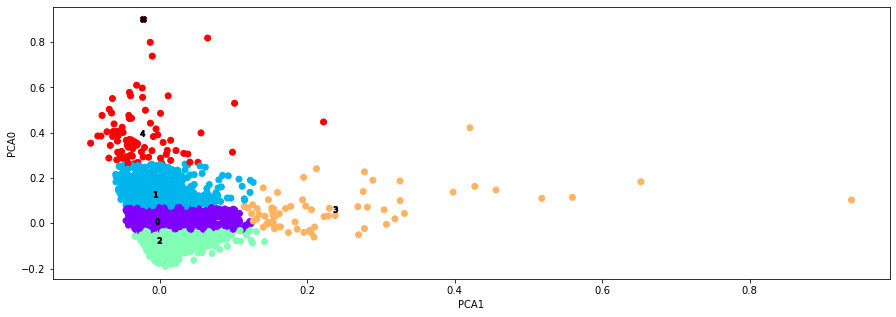

In [165]:
## Gráficos de clusters com os Outliers
# Cluster 4

plt.figure(figsize=(15,5))
plt.xlabel('PCA1')
plt.ylabel('PCA0')
plt.scatter( df_pca_norm_components[1], df_pca_norm_components[0], c= kmeans_clusters_pca_norm['clusters'],cmap='rainbow', alpha=1)
plt.scatter(km_modelo_pca_norm.cluster_centers_[0,1] , km_modelo_pca_norm.cluster_centers_[0,0], color='black', marker='$0$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[1,1] , km_modelo_pca_norm.cluster_centers_[1,0], color='black', marker='$1$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[2,1] , km_modelo_pca_norm.cluster_centers_[2,0], color='black', marker='$2$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[3,1] , km_modelo_pca_norm.cluster_centers_[3,0], color='black', marker='$3$')
plt.scatter(km_modelo_pca_norm.cluster_centers_[4,1] , km_modelo_pca_norm.cluster_centers_[4,0], color='black', marker='$4$')
plt.scatter(df_pca_norm_components2.loc[dist_cluster4_pca_norm_max.index, 1], df_pca_norm_components2.loc[dist_cluster4_pca_norm_max.index, 0], color='black', marker='X')

In [166]:
### FIM DO SCRIPT ###